## Assignment:

Beat the performance of my Lasso regression by **using different feature engineering steps ONLY!!**.

The performance of my current model, as shown in this notebook is:

- test mse: 1063016789.3316755
- test rmse: 32603.938248801718
- test r2: 0.8453144708738004

To beat my model you will need a test r2 bigger than 0.85 and a rmse smaller than 32603.


=====================================================================================================


### Conditions:

- You MUST NOT change the hyperparameters of the Lasso.
- You MUST use the same seeds in Lasso and train_test_split as I show in this notebook (random_state)
- You MUST use all the features of the dataset (except Id) - you MUST NOT select features


=====================================================================================================


### If you beat my model:

Make a pull request with your notebook to this github repo:
https://github.com/solegalli/udemy-feml-challenge

And add your notebook to the folder:

-StudentsSolutions_v1.0.0

### How to make the PR

1) fork the repo:

Go to https://github.com/solegalli/udemy-feml-challenge, and click on the **fork** button at the top-right

2) clone your forked repo into your local computer:

- Go to www.github.com/yourusername/udemy-feml-challenge
- Click the green button that says clone or download
- copy the url that opens up
- power up a git console
- type: git clone (paste the url you copied from github)
- done

3) Make a copy of the jupyter notebook and add your name:

- Open up the Jupyter notebook called 13-Assignement.ipynb
- Click the "File" button at the top-right and then click "Make a copy"
- **Work your solution in the Copy** and not in the original assignment (otherwise there will be conflicts when making the PR)
- Change the name of the copy of the notebook to: 13-Assignement_yourname.ipynb
- Move the notebook to the folder **StudentsSolutions_v1.0.0**
- done

When you finish, just commit the new notebook to your fork and then make a PR to my repo.

- git add StudentsSolutions_v1.0.0/13-Assignement_yourname.ipynb
- git commit -m "your commit message"
- git push origin master or git push origin yourfeaturebranch
- go to your repo and make a pull request.


## But i have a notebook ready and I haven't cloned the repo yet, how can I make the PR?

If you worked in the copy you downloaded from Udemy before forking and cloning this repo, then follow this steps:

1) fork the repo:

Go to https://github.com/solegalli/udemy-feml-challenge, and click on the fork button at the top-right

2) clone your forked repo into your local computer:

Go to www.github.com/yourusername/udemy-feml-challenge

- Click the green button that says clone or download
- Copy the url that opens up
- Power up a git console
- Type: git clone (paste the url you copied from github)
- Done

3) Rename your solution as follows and copy it into your cloned repo:

- Rename your solution notebook to: 13-Assignement_yourname.ipynb
- Copy this file into the cloned repo, inside the folder **StudentsSolutions_v1.0.0**
- Done

When you finish, just commit the new notebook to your fork and then make a PR to my repo

- git add StudentsSolutions_v1.0.0/13-Assignement_yourname.ipynb
- git commit -m "your commit message"
- git push origin master or git push origin yourfeaturebranch
- go to your repo and make a pull request.

**Good luck!!**

## House Prices dataset

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for Q-Q plots
import scipy.stats as stats

# for the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# for feature engineering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from feature_engine import imputation as mdi
from feature_engine import discretisation as dsc
from feature_engine import encoding as ce
import feature_engine.transformation as vt
from feature_engine.discretisation import EqualFrequencyDiscretiser
from feature_engine.encoding import OrdinalEncoder
from feature_engine.outliers import Winsorizer
from feature_engine.wrappers import SklearnTransformerWrapper

### Load Datasets

In [2]:
# load dataset

data = pd.read_csv('../houseprice.csv')

In [3]:
# make lists of variable types

categorical = [var for var in data.columns if data[var].dtype == 'O']

year_vars = [var for var in data.columns if 'Yr' in var or 'Year' in var]

discrete = [
    var for var in data.columns if data[var].dtype != 'O'
    and len(data[var].unique()) < 20 and var not in year_vars
]

numerical = [
    var for var in data.columns if data[var].dtype != 'O'
    if var not in discrete and var not in ['Id', 'SalePrice']
    and var not in year_vars
]

print('There are {} continuous variables'.format(len(numerical)))
print('There are {} discrete variables'.format(len(discrete)))
print('There are {} temporal variables'.format(len(year_vars)))
print('There are {} categorical variables'.format(len(categorical)))

There are 18 continuous variables
There are 14 discrete variables
There are 4 temporal variables
There are 43 categorical variables


### Analyse continous variables

In [4]:
data[numerical].describe()

LotFrontage        LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1201.000000    1460.000000  1452.000000  1460.000000  1460.000000   
mean     70.049958   10516.828082   103.685262   443.639726    46.549315   
std      24.284752    9981.264932   181.066207   456.098091   161.319273   
min      21.000000    1300.000000     0.000000     0.000000     0.000000   
25%      59.000000    7553.500000     0.000000     0.000000     0.000000   
50%      69.000000    9478.500000     0.000000   383.500000     0.000000   
75%      80.000000   11601.500000   166.000000   712.250000     0.000000   
max     313.000000  215245.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean   1515.463699   472.980137    94.244521    46.660274      21.954110   
std     525.480383   213.804841   125.338794    66.256028      61.119149   
min     334.000000     0.000000     0.000000     0.000000       0.000000   
25%    1129.500000   334.500000     0.000000     0.000000       0.000000   
50%    1464.000000   480.000000     0.000000    25.000000       0.000000   
75%    1776.750000   576.000000   168.000000    68.000000       0.000000   
max    5642.000000  1418.000000   857.000000   547.000000     552.000000   

         3SsnPorch  ScreenPorch       MiscVal  
count  1460.000000  1460.000000   1460.000000  
mean      3.409589    15.060959     43.489041  
std      29.317331    55.757415    496.123024  
min       0.000000     0.000000      0.000000  
25%       0.000000     0.000000      0.000000  
50%       0.000000     0.000000      0.000000  
75%       0.000000     0.000000      0.000000  
max     508.000000   480.000000  15500.000000

In [207]:
data[year_vars].head()

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
0       2003          2003       2003.0    2008
1       1976          1976       1976.0    2007
2       2001          2002       2001.0    2008
3       1915          1970       1998.0    2006
4       2000          2000       2000.0    2008

In [191]:
# let's output variables with NA and the percentage of NA

for var in numerical + year_vars:
    if data[var].isnull().sum() > 0:
        print(var, data[var].isnull().mean())

LotFrontage 0.1773972602739726
MasVnrArea 0.005479452054794521
GarageYrBlt 0.05547945205479452


In [6]:
data.groupby(data['MasVnrArea'].isnull())['SalePrice'].mean()

MasVnrArea
False    180615.063361
True     236484.250000
Name: SalePrice, dtype: float64

In [7]:
data.groupby(data['LotFrontage'].isnull())['SalePrice'].mean()

LotFrontage
False    180770.480433
True     181620.073359
Name: SalePrice, dtype: float64

In [192]:
data.groupby(data['GarageYrBlt'].isnull())['SalePrice'].mean()

GarageYrBlt
False    185479.511240
True     103317.283951
Name: SalePrice, dtype: float64

In [8]:
def diagnostic_plots(df, variable):
    # The function takes a dataframe (df) and
    # the variable of interest as arguments.

    # Define figure size.
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [9]:
# plot the histograms to have a quick look at the variable distribution
# histogram and Q-Q plots

def transformations_plot(df, variable):
    print(variable)
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(21,3))
    plt.subplot(1, 7, 1)
    df[variable].hist()

    plt.subplot(1, 7, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.subplot(1, 7, 3)
    stats.probplot(np.log(df[variable]), dist="norm", plot=plt)
    plt.title("Logarithmic tranformation")

    plt.subplot(1, 7, 4)
    stats.probplot(1 / (df[variable]), dist="norm", plot=plt)
    plt.title("Reciprocal tranformation")

    plt.subplot(1, 7, 5)
    stats.probplot((df[variable]) ** (1/2) , dist="norm", plot=plt)
    plt.title("Square root tranformation")

    plt.subplot(1, 7, 6)
    stats.probplot(stats.boxcox(df[variable] + 0.00001)[0], dist="norm", plot=plt)
    plt.title("BoxCox tranformation")

    plt.subplot(1, 7, 7)
    stats.probplot(stats.yeojohnson(df[variable])[0], dist="norm", plot=plt)
    plt.title("Yeojohnson tranformation")

    plt.show()

In [401]:
def transformations_plot(df, variable):
    # function to plot a histogram and a Q-Q plot
    
    plt.figure(figsize=(18,6))
    plot_distriburtions(df[variable], 1, "variable")
    plot_distriburtions(np.log(df[variable]), 2, "logarithm")
    plot_distriburtions(1 / (df[variable]), 3, "reciprocal")
    plot_distriburtions((df[variable]) ** (1/2) , 4, "square root")
    plot_distriburtions(pd.Series(stats.boxcox(df[variable] + 0.00001)[0]) , 5, "boxcox")
    plot_distriburtions(pd.Series(stats.yeojohnson(df[variable])[0]) , 6, "yeojohnson")
    plt.show()
  

def plot_distriburtions(series, position, title):
    plt.subplot(2, 6, position)
    stats.probplot(series, dist="norm", plot=plt)
    plt.title(title)
    plt.subplot(2, 6, position + 6)
    series.hist()


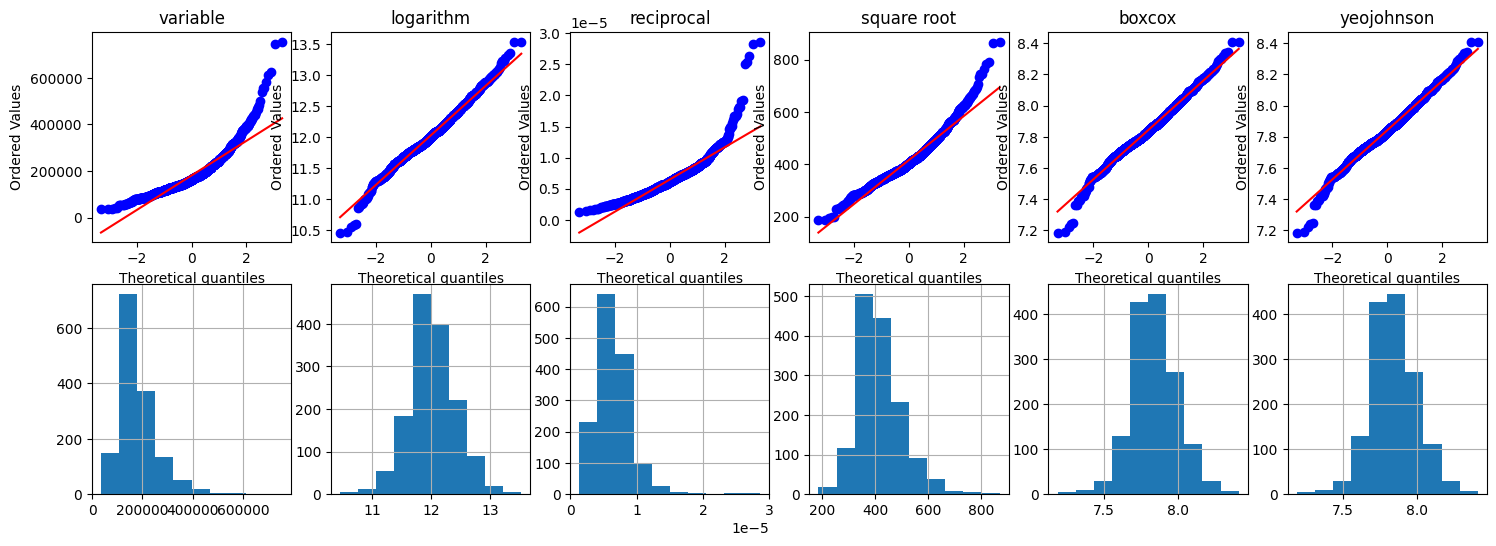

In [402]:
transformations_plot(data, "SalePrice")

In [10]:
def correlation_plots(df, variable):
    sns.jointplot(x=df['SalePrice'], y=df[variable], kind="reg")
    plt.show()

In [110]:
def outliers_removal(df, variable):
    temp = df[[variable, "SalePrice"]].copy()
    temp[variable].fillna(temp[variable].median(), inplace=True)
    variable_array = np.array(temp[variable]).reshape(-1, 1)
    windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='right', # cap left, right or both tails 
                          fold=1.5)
    try:
        windsoriser.fit(variable_array)
        temp["no_outliers"] = windsoriser.transform(variable_array)
    except Exception:
        print(f"Unable to cut outliers for {variable}")
    temp.rename(columns= {variable: "variable"}, inplace=True)
    return {variable: dict(temp.corr()["SalePrice"].sort_values(ascending=False, key=lambda x: abs(x))[1:])}

In [135]:
def correlation_transformed(df, variable, plot=False):
    temp = df[[variable, "SalePrice"]].copy()
    temp[variable].fillna(temp[variable].median(), inplace=True)
    temp["SalePrice"] = stats.boxcox(temp["SalePrice"] + 0.00001)[0]
    temp["log"] =  np.log(temp[variable] + 0.00001)
    temp["reciprocal"] = 1 / temp[variable]
    temp["squareroot"] = temp[variable] ** (1/2)
    temp["exponential"] = temp[variable] ** (1/5)
    temp["boxcox"] = stats.boxcox(temp[variable] + 0.00001)[0]
    temp["yeojohnson"] = stats.yeojohnson(temp[variable])[0]
    variable_array = np.array(temp[variable]).reshape(-1, 1)
    windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='right', # cap left, right or both tails 
                          fold=1.5)
    try:
        windsoriser.fit(variable_array)
        temp["no_outliers"] = windsoriser.transform(variable_array)
    except Exception:
        print(f"Unable to cut outliers for {variable}")
    disc = EqualFrequencyDiscretiser()
    disc.fit(np.array(variable_array))
    temp["discretize"] = disc.transform(variable_array)
    enc = OrdinalEncoder(encoding_method = 'ordered')
    enc.fit(np.array(temp["discretize"].astype('O')).reshape(-1, 1), temp["SalePrice"])
    temp["discretize_encode"] = enc.transform(np.array(temp["discretize"]).reshape(-1, 1))
    temp["binarize"] = (temp[variable] > 0).astype("int")
    dt_disc = dsc.DecisionTreeDiscretiser(random_state=2909)
    dt_disc.fit(np.array(variable_array), df["SalePrice"])
    temp["dt_discretize"] = dt_disc.transform(variable_array)
    if plot:
        for var in temp.columns:
            print(var)
            correlation_plots(temp, var)
    temp.rename(columns= {variable: "variable"}, inplace=True)
    return {variable: dict(temp.corr()["SalePrice"].sort_values(ascending=False, key=lambda x: abs(x))[1:])}

In [111]:
outliers = pd.DataFrame()
for col in numerical:
    corr = outliers_removal(data, col)
    outliers = outliers.append(pd.DataFrame.from_dict(corr, orient='index'))

/tmp/ipykernel_865/1564316552.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(pd.DataFrame.from_dict(corr, orient='index'))
/tmp/ipykernel_865/1564316552.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(pd.DataFrame.from_dict(corr, orient='index'))
/tmp/ipykernel_865/1564316552.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(pd.DataFrame.from_dict(corr, orient='index'))
/tmp/ipykernel_865/1564316552.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(pd.DataFrame.from_dict(corr, orient='index'))
/tmp/ipykernel_865/15643

Unable to cut outliers for BsmtFinSF2
Unable to cut outliers for LowQualFinSF
Unable to cut outliers for EnclosedPorch
Unable to cut outliers for 3SsnPorch
Unable to cut outliers for ScreenPorch
Unable to cut outliers for MiscVal


/tmp/ipykernel_865/1564316552.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(pd.DataFrame.from_dict(corr, orient='index'))
/tmp/ipykernel_865/1564316552.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(pd.DataFrame.from_dict(corr, orient='index'))
/tmp/ipykernel_865/1564316552.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(pd.DataFrame.from_dict(corr, orient='index'))
/tmp/ipykernel_865/1564316552.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(pd.DataFrame.from_dict(corr, orient='index'))
/tmp/ipykernel_865/15643

In [120]:
variables_outliers = outliers[outliers["no_outliers"] > outliers["variable"]].index.to_list()

In [136]:
result = pd.DataFrame()
for col in numerical:
    corr = correlation_transformed(data, col)
    result = result.append(pd.DataFrame.from_dict(corr, orient='index'))

/tmp/ipykernel_865/3331061848.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(pd.DataFrame.from_dict(corr, orient='index'))
/tmp/ipykernel_865/3331061848.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(pd.DataFrame.from_dict(corr, orient='index'))
/tmp/ipykernel_865/3331061848.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(pd.DataFrame.from_dict(corr, orient='index'))
/tmp/ipykernel_865/3331061848.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(pd.DataFrame.from_dict(corr, orient='index'))
/tmp/ipykernel_865/3331061848.py:4: Futu

Unable to cut outliers for BsmtFinSF2


/tmp/ipykernel_865/3331061848.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(pd.DataFrame.from_dict(corr, orient='index'))
/tmp/ipykernel_865/3331061848.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(pd.DataFrame.from_dict(corr, orient='index'))
/tmp/ipykernel_865/3331061848.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(pd.DataFrame.from_dict(corr, orient='index'))
/tmp/ipykernel_865/3331061848.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(pd.DataFrame.from_dict(corr, orient='index'))


Unable to cut outliers for LowQualFinSF


/tmp/ipykernel_865/3331061848.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(pd.DataFrame.from_dict(corr, orient='index'))
/tmp/ipykernel_865/3331061848.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(pd.DataFrame.from_dict(corr, orient='index'))
/tmp/ipykernel_865/3331061848.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(pd.DataFrame.from_dict(corr, orient='index'))
/tmp/ipykernel_865/3331061848.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(pd.DataFrame.from_dict(corr, orient='index'))
/tmp/ipykernel_865/3331061848.py:4: Futu

Unable to cut outliers for EnclosedPorch
Unable to cut outliers for 3SsnPorch


/tmp/ipykernel_865/3331061848.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(pd.DataFrame.from_dict(corr, orient='index'))
/tmp/ipykernel_865/3331061848.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(pd.DataFrame.from_dict(corr, orient='index'))


Unable to cut outliers for ScreenPorch
Unable to cut outliers for MiscVal


/tmp/ipykernel_865/3331061848.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(pd.DataFrame.from_dict(corr, orient='index'))


In [137]:
result

dt_discretize  discretize_encode  discretize  no_outliers  \
LotFrontage         0.477238           0.444534    0.382545     0.375745   
LotArea             0.462708           0.460935    0.455381     0.436017   
MasVnrArea          0.380910           0.424552    0.424552     0.426017   
BsmtFinSF1          0.445071           0.381180    0.361202     0.384863   
BsmtFinSF2          0.108114           0.032655   -0.032655          NaN   
BsmtUnfSF           0.312467           0.278894    0.163262     0.213097   
TotalBsmtSF         0.636913           0.610114    0.606684     0.641109   
1stFlrSF            0.587564           0.580620    0.578424     0.614620   
2ndFlrSF            0.415369           0.415872    0.367967     0.316579   
LowQualFinSF        0.113363                NaN         NaN          NaN   
GrLivArea           0.707619           0.704648    0.704648     0.719615   
GarageArea          0.657415           0.637597    0.636918     0.660221   
WoodDeckSF          0.375832           0.329440    0.327769     0.340368   
OpenPorchSF         0.473374           0.426675    0.405744     0.381433   
EnclosedPorch       0.219823           0.130098   -0.130098          NaN   
3SsnPorch           0.064125                NaN         NaN          NaN   
ScreenPorch         0.124699                NaN         NaN          NaN   
MiscVal             0.073563                NaN         NaN          NaN   

               yeojohnson    boxcox  squareroot  exponential       log  \
LotFrontage      0.349588  0.349499    0.349005     0.348613  0.345149   
LotArea          0.398997  0.398994    0.365520     0.395825  0.398689   
MasVnrArea       0.398202  0.387959    0.436992     0.414693  0.393224   
BsmtFinSF1       0.249904  0.206191    0.300734     0.225492  0.181580   
BsmtFinSF2      -0.032713 -0.032714   -0.015472    -0.027048 -0.031367   
BsmtUnfSF        0.212549  0.215605    0.214178     0.215588  0.203181   
TotalBsmtSF      0.610857  0.598081    0.579673     0.428269  0.272613   
1stFlrSF         0.606967  0.606968    0.606248     0.608220  0.607600   
2ndFlrSF         0.170097  0.157896    0.244235     0.190158  0.161836   
LowQualFinSF    -0.057153 -0.057153   -0.048423    -0.054265 -0.056466   
GrLivArea        0.729386  0.729385    0.720251     0.727304  0.729421   
GarageArea       0.647222  0.619103    0.609232     0.484838  0.378547   
WoodDeckSF       0.339803  0.327311    0.353739     0.341957  0.328254   
OpenPorchSF      0.458870  0.455821    0.426191     0.457401  0.454695   
EnclosedPorch   -0.217981 -0.217991   -0.188622    -0.208393 -0.215540   
3SsnPorch        0.058397  0.058397    0.058955     0.059236  0.058768   
ScreenPorch      0.100107  0.100106    0.114138     0.106541  0.102167   
MiscVal         -0.073563 -0.073563   -0.048277    -0.065193 -0.071340   

               variable  reciprocal  binarize  
LotFrontage    0.333764   -0.304114       NaN  
LotArea        0.255397   -0.321517       NaN  
MasVnrArea     0.421401   -0.073130  0.381769  
BsmtFinSF1     0.369564    0.012864  0.164169  
BsmtFinSF2     0.006244   -0.020188 -0.032715  
BsmtUnfSF      0.221045   -0.017016  0.192593  
TotalBsmtSF    0.609149   -0.485873  0.202501  
1stFlrSF       0.593533   -0.585025       NaN  
2ndFlrSF       0.317707   -0.513177  0.150713  
LowQualFinSF  -0.038494   -0.013540 -0.057153  
GrLivArea      0.697018   -0.710257       NaN  
GarageArea     0.649638   -0.566529  0.329116  
WoodDeckSF     0.333121   -0.242647  0.320320  
OpenPorchSF    0.318872   -0.178548  0.448984  
EnclosedPorch -0.149878   -0.057916 -0.218003  
3SsnPorch      0.055339   -0.127914  0.058397  
ScreenPorch    0.121459   -0.317179  0.100106  
MiscVal       -0.019930   -0.378410 -0.073563

In [140]:
result.drop(["no_outliers"], axis=1).transpose().idxmax()

LotFrontage          dt_discretize
LotArea              dt_discretize
MasVnrArea              squareroot
BsmtFinSF1           dt_discretize
BsmtFinSF2           dt_discretize
BsmtUnfSF            dt_discretize
TotalBsmtSF          dt_discretize
1stFlrSF               exponential
2ndFlrSF         discretize_encode
LowQualFinSF         dt_discretize
GrLivArea                      log
GarageArea           dt_discretize
WoodDeckSF           dt_discretize
OpenPorchSF          dt_discretize
EnclosedPorch        dt_discretize
3SsnPorch            dt_discretize
ScreenPorch          dt_discretize
MiscVal              dt_discretize
dtype: object

In [141]:
var_squareroot = ["MasVnrArea"]
var_exponential = ["1stFlrSF"]
var_log = ["GrLivArea"]

<AxesSubplot: >

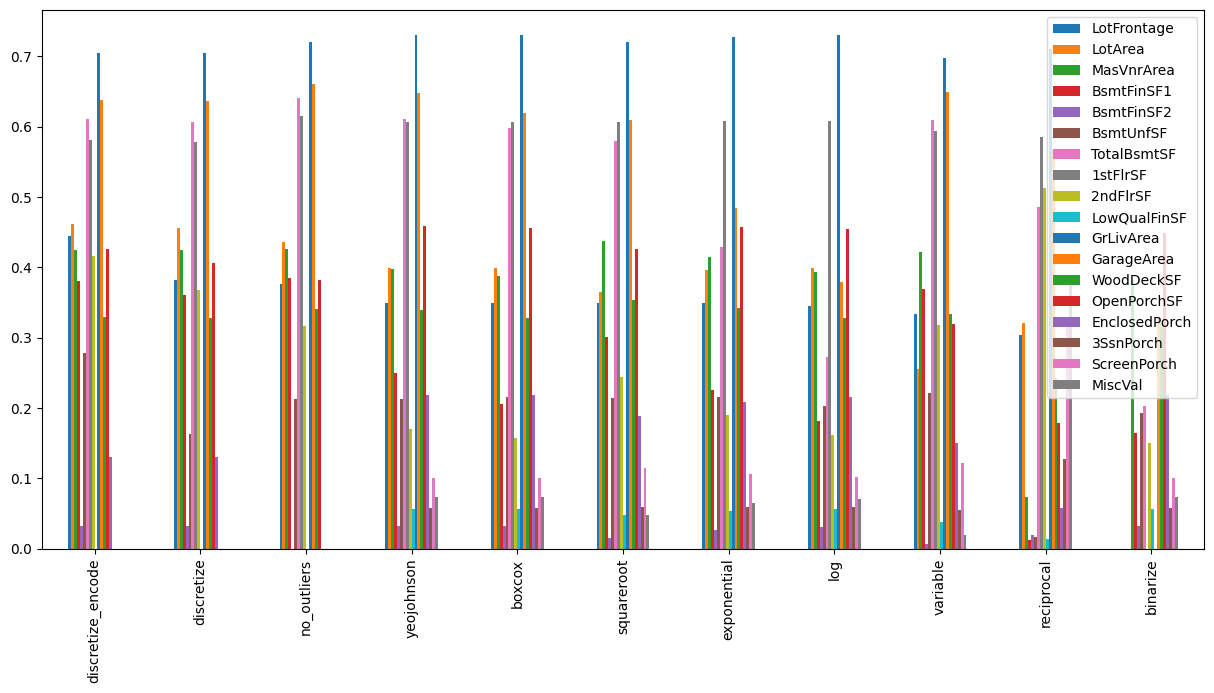

In [64]:
result.abs().transpose().plot.bar(figsize=(15,7))

In [71]:
result.abs().mean().sort_values(ascending=False)

no_outliers          0.459140
discretize_encode    0.418415
discretize           0.398418
yeojohnson           0.317353
squareroot           0.315549
boxcox               0.310708
variable             0.306197
exponential          0.297724
log                  0.277247
reciprocal           0.273658
binarize             0.195007
dtype: float64

In [76]:
result.transpose().idxmax()

LotFrontage      discretize_encode
LotArea          discretize_encode
MasVnrArea              squareroot
BsmtFinSF1             no_outliers
BsmtFinSF2       discretize_encode
BsmtUnfSF        discretize_encode
TotalBsmtSF            no_outliers
1stFlrSF               no_outliers
2ndFlrSF         discretize_encode
LowQualFinSF            reciprocal
GrLivArea                      log
GarageArea             no_outliers
WoodDeckSF              squareroot
OpenPorchSF             yeojohnson
EnclosedPorch    discretize_encode
3SsnPorch              exponential
ScreenPorch               variable
MiscVal                   variable
dtype: object

LotFrontage
   LotFrontage  SalePrice       log  reciprocal  squareroot  exponential  \
0         65.0   7.932608  4.174387    0.015385    8.062258     2.304532   
1         80.0   7.878261  4.382027    0.012500    8.944272     2.402249   
2         68.0   7.959616  4.219508    0.014706    8.246211     2.325422   
3         60.0   7.774953  4.094345    0.016667    7.745967     2.267933   
4         84.0   8.002872  4.430817    0.011905    9.165151     2.425805   

      boxcox  yeojohnson  no_outliers  discretize  discretize_encode  binarize  
0  11.570662   11.316796         65.0           3                  4         1  
1  12.859752   12.535727         80.0           7                  7         1  
2  11.841153   11.572630         68.0           3                  4         1  
3  11.103446   10.874835         60.0           2                  0         1  
4  13.179592   12.838022         84.0           8                  8         1  
SalePrice            1.000000
discretize_enco

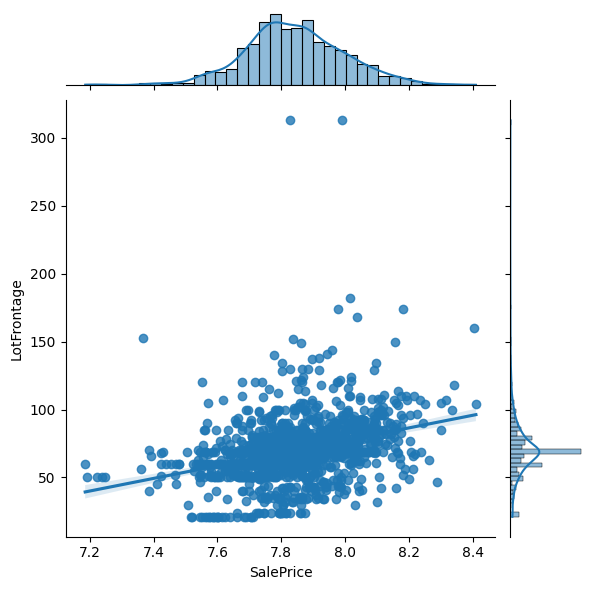

SalePrice


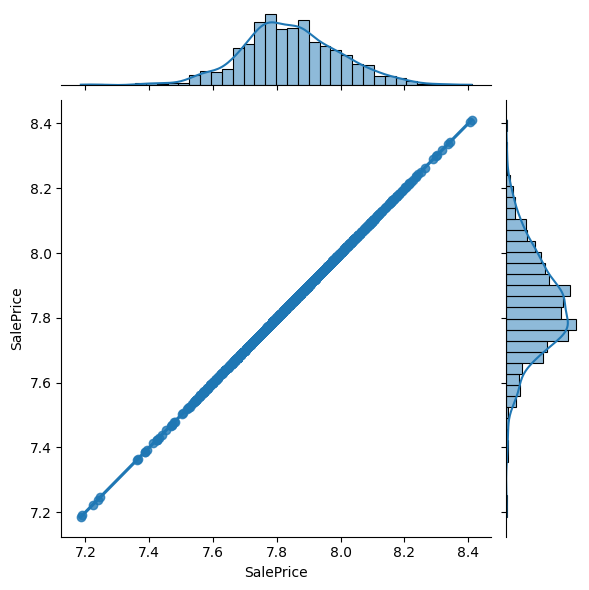

log


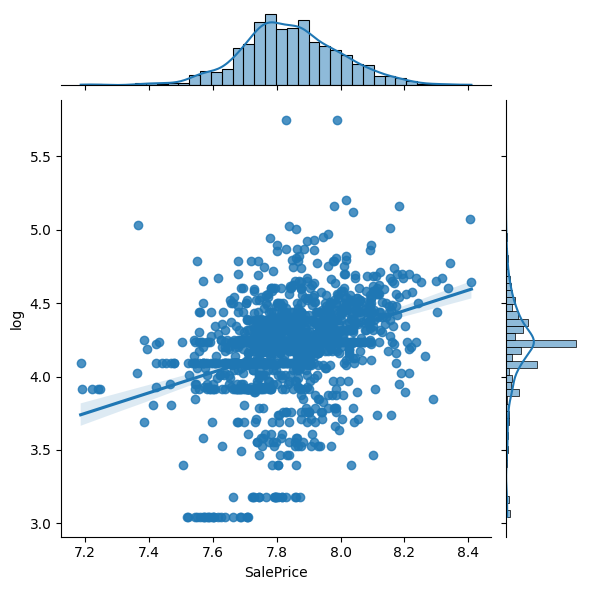

reciprocal


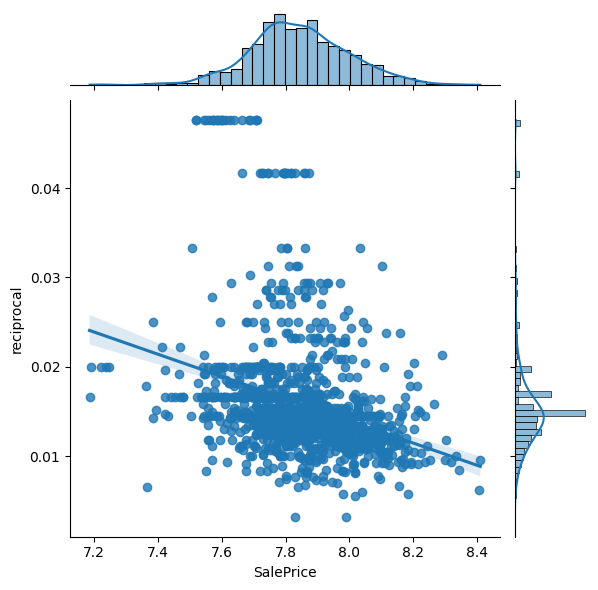

squareroot


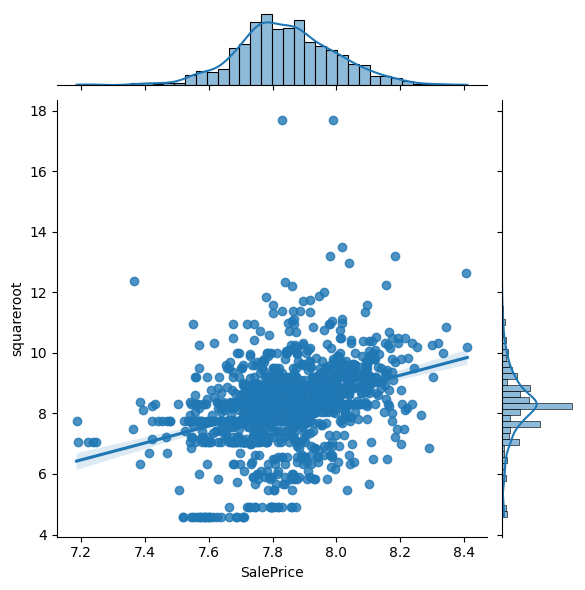

exponential


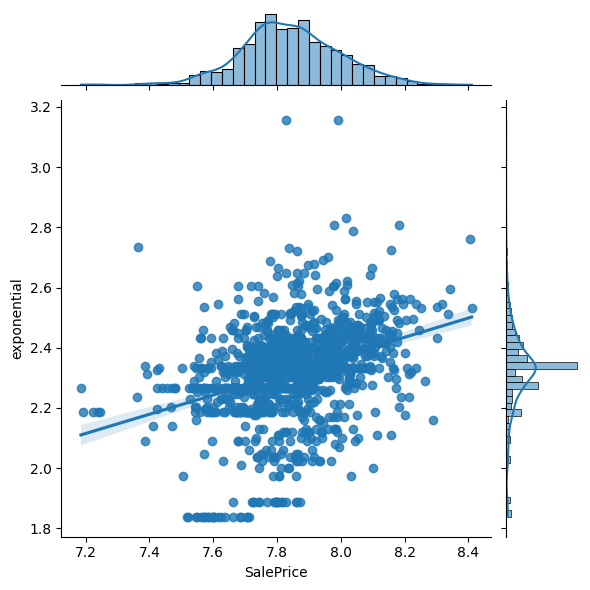

boxcox


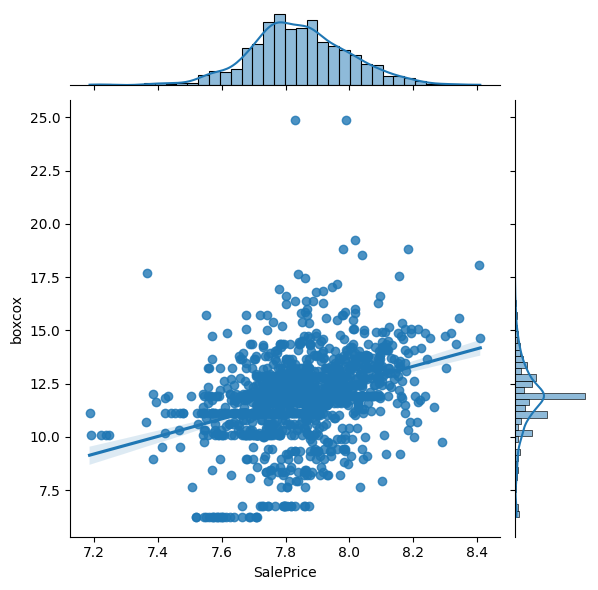

yeojohnson


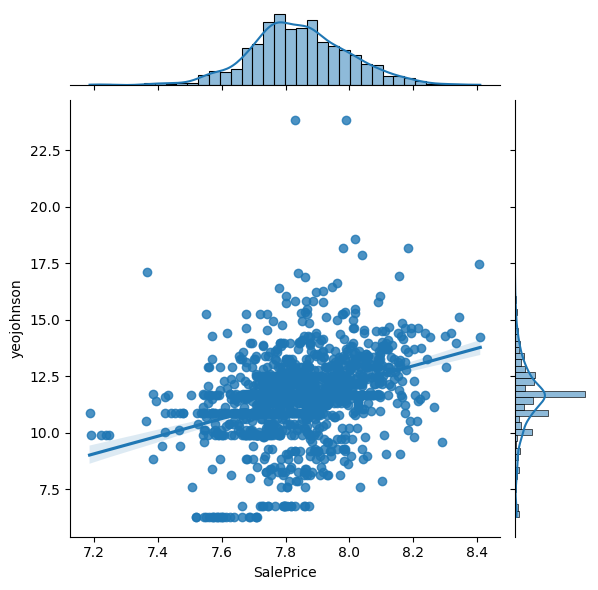

no_outliers


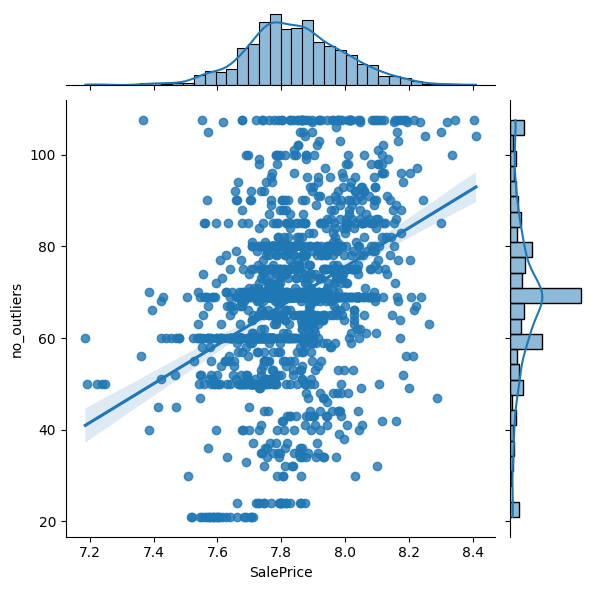

discretize


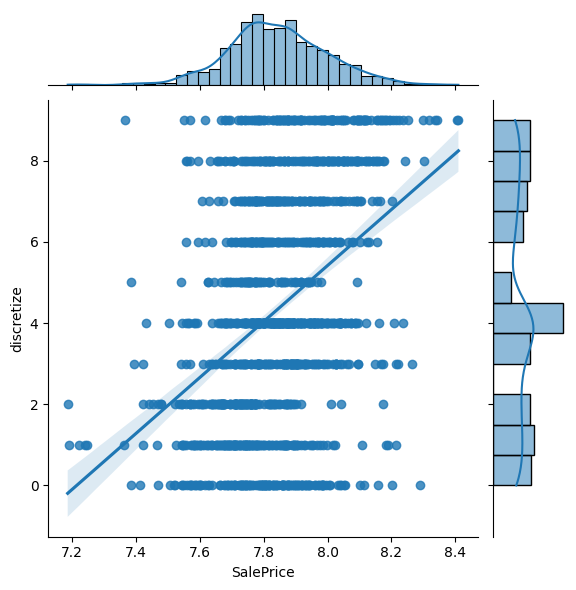

discretize_encode


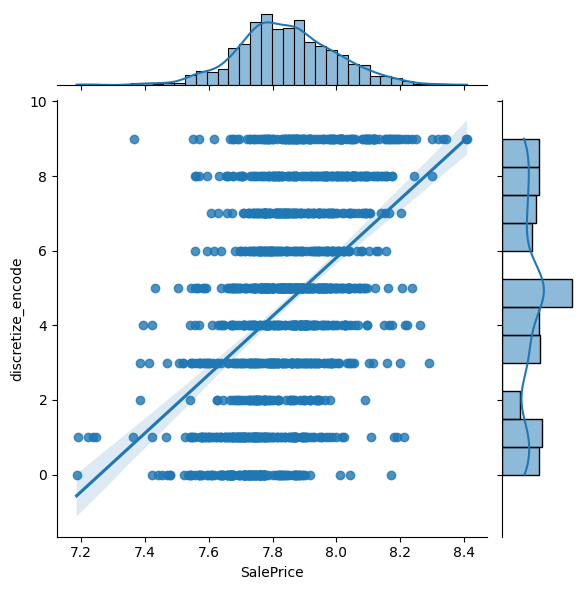

binarize


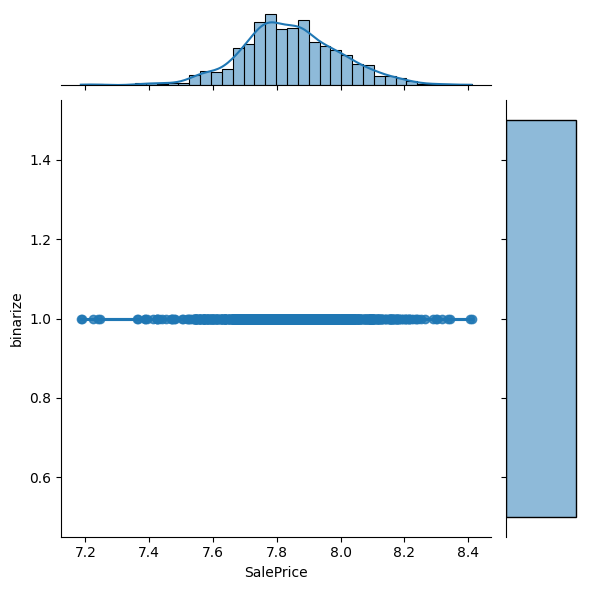

LotArea
   LotArea  SalePrice       log  reciprocal  squareroot  exponential  \
0     8450   7.932608  9.041922    0.000118   91.923882     6.100583   
1     9600   7.878261  9.169518    0.000104   97.979590     6.258269   
2    11250   7.959616  9.328123    0.000089  106.066017     6.459970   
3     9550   7.774953  9.164296    0.000105   97.724101     6.251737   
4    14260   8.002872  9.565214    0.000070  119.415242     6.773668   

      boxcox  yeojohnson  no_outliers  discretize  discretize_encode  binarize  
0  10.433680   10.427531       8450.0           3                  2         1  
1  10.602810   10.596445       9600.0           5                  5         1  
2  10.813974   10.807340      11250.0           7                  7         1  
3  10.595875   10.589519       9550.0           5                  5         1  
4  11.131571   11.124530      14260.0           8                  8         1  
SalePrice            1.000000
discretize_encode    0.460935
discretize   

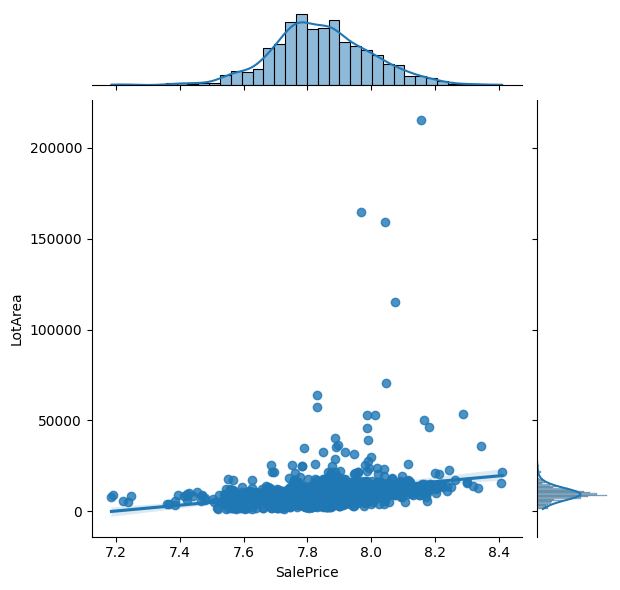

SalePrice


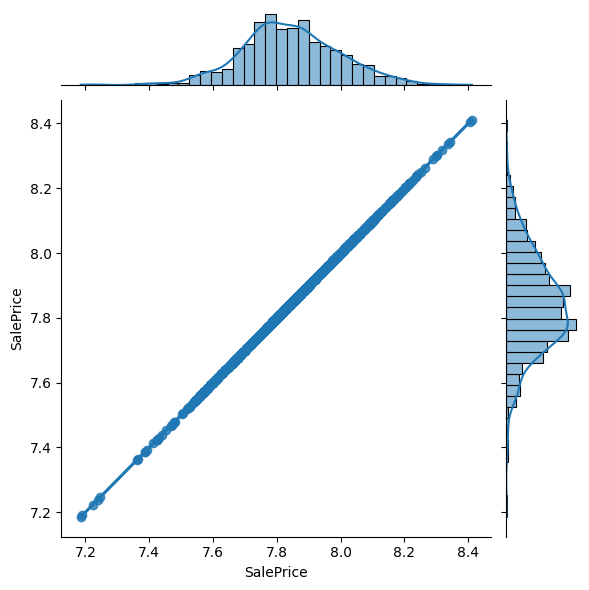

log


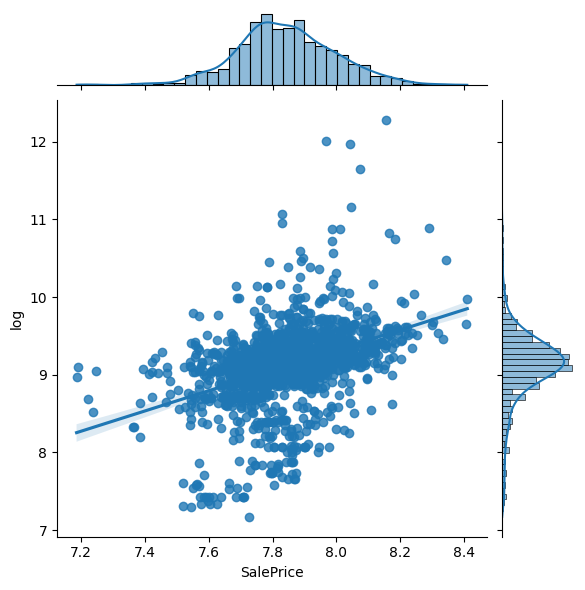

reciprocal


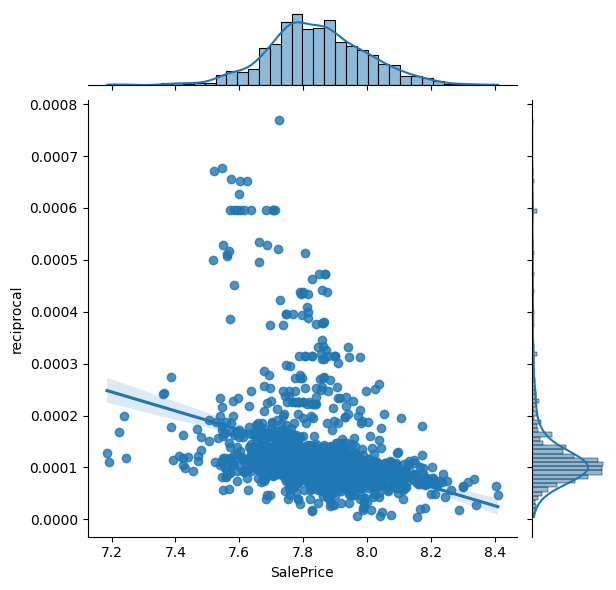

squareroot


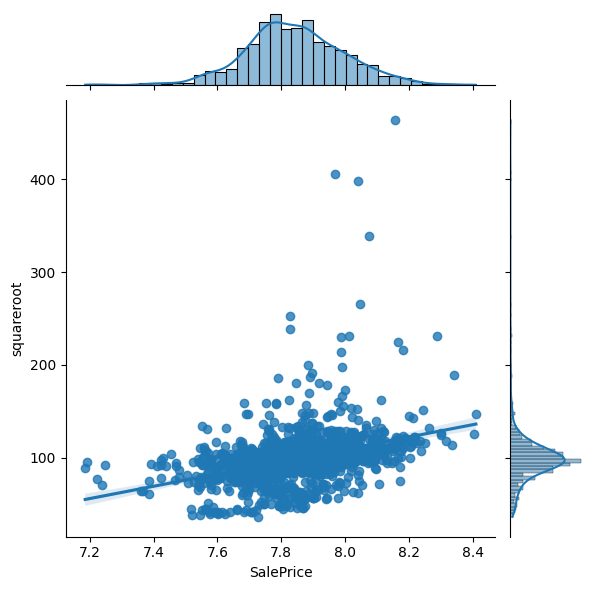

exponential


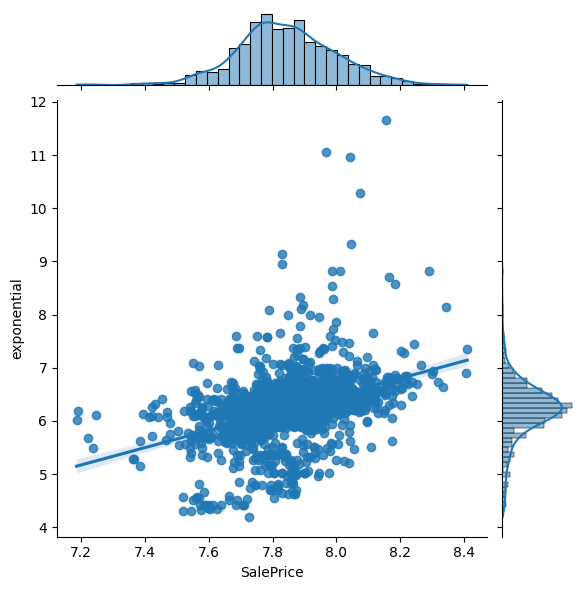

boxcox


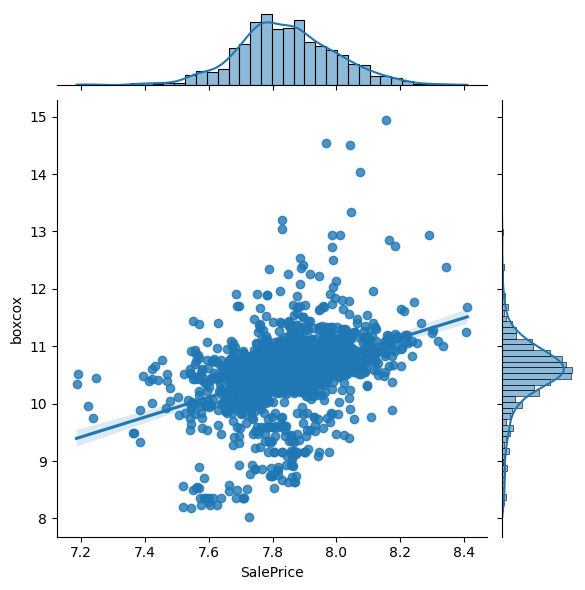

yeojohnson


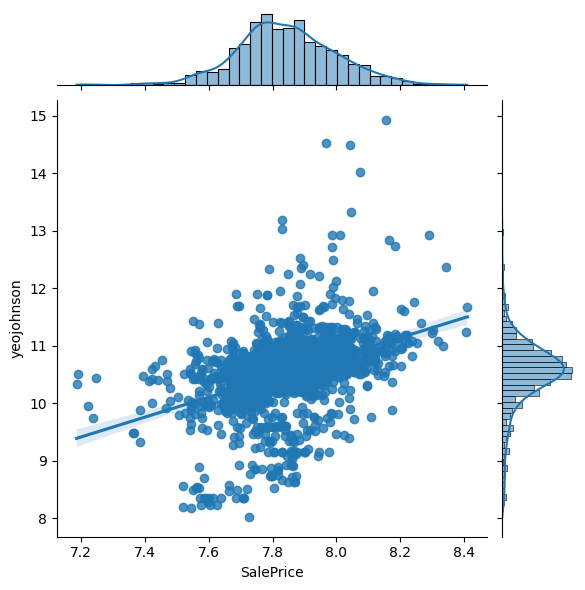

no_outliers


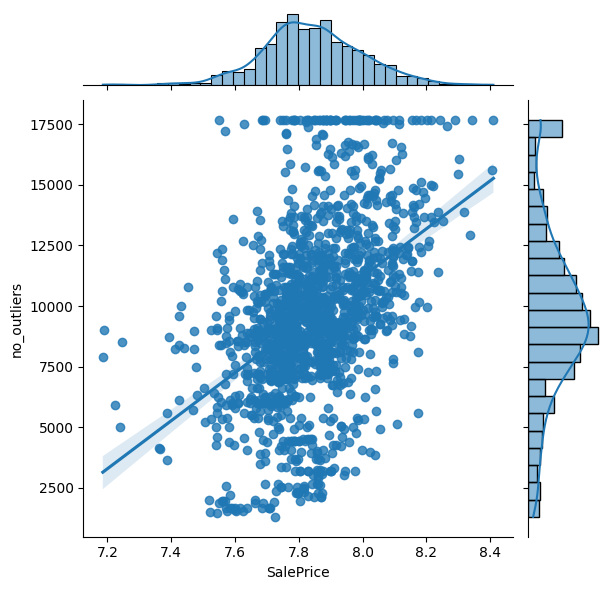

discretize


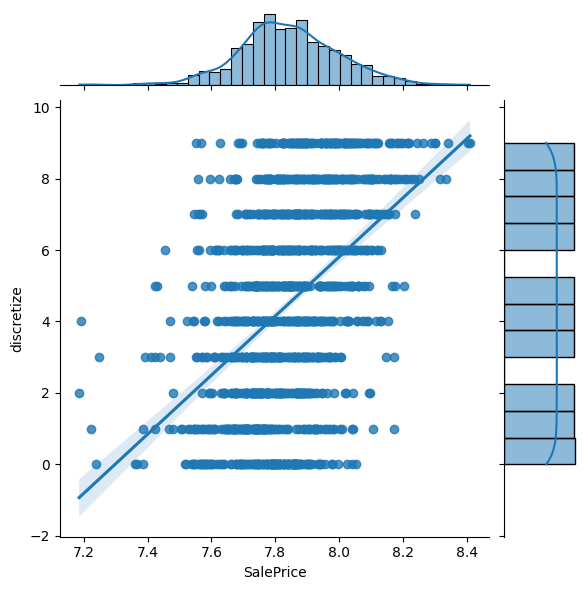

discretize_encode


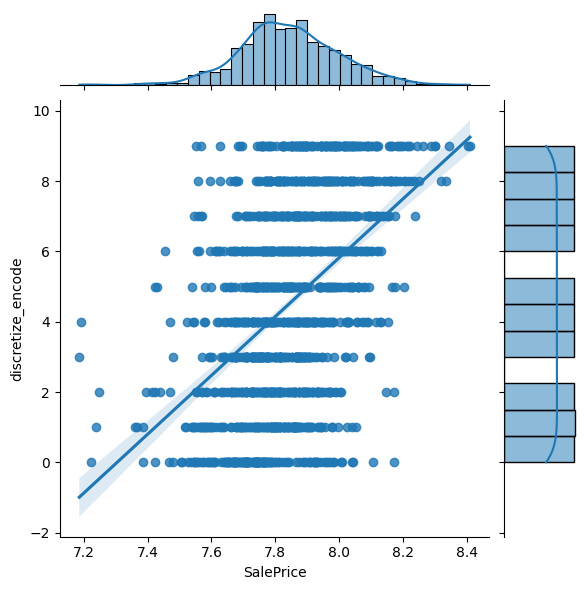

binarize


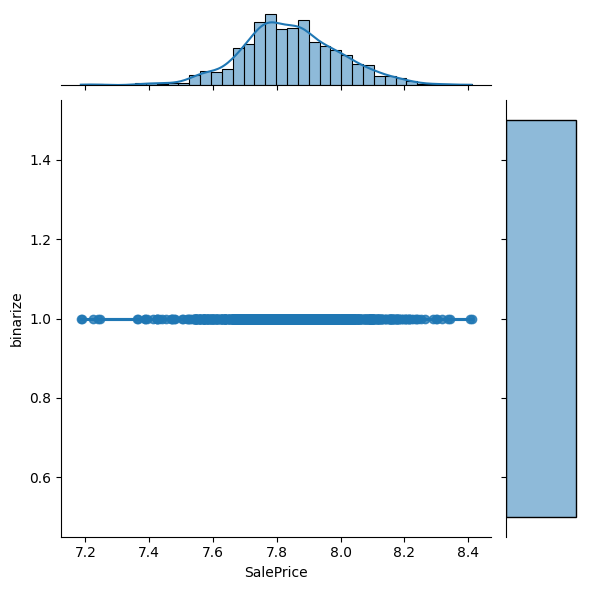

MasVnrArea
   MasVnrArea  SalePrice        log  reciprocal  squareroot  exponential  \
0       196.0   7.932608   5.278115    0.005102   14.000000     2.873765   
1         0.0   7.878261 -11.512925         inf    0.000000     0.000000   
2       162.0   7.959616   5.087596    0.006173   12.727922     2.766324   
3         0.0   7.774953 -11.512925         inf    0.000000     0.000000   
4       350.0   8.002872   5.857933    0.002857   18.708287     3.227109   

      boxcox  yeojohnson  no_outliers  discretize  discretize_encode  binarize  
0   4.406884    2.967319        196.0           2                  2         1  
1 -17.758996   -0.000000          0.0           0                  0         0  
2   4.274708    2.913979        162.0           2                  2         1  
3 -17.758996   -0.000000          0.0           0                  0         0  
4   4.798386    3.115500        350.0           4                  4         1  
SalePrice            1.000000
squareroot      

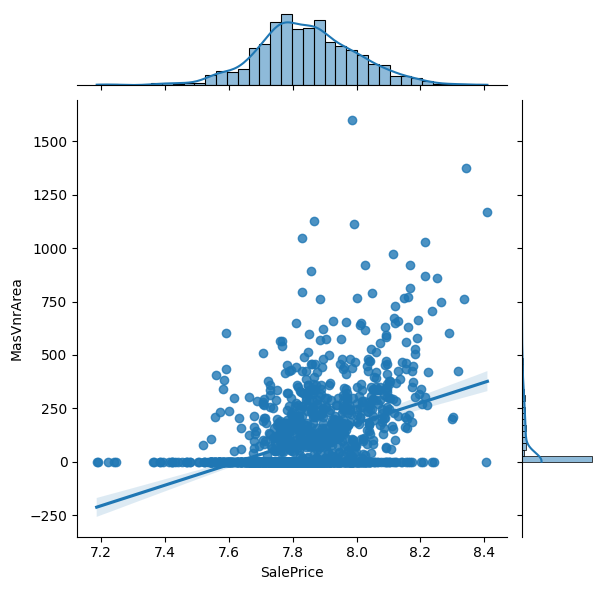

SalePrice


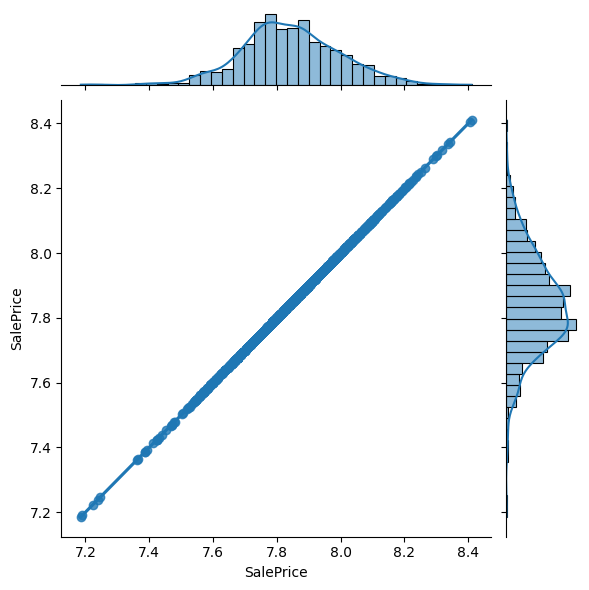

log


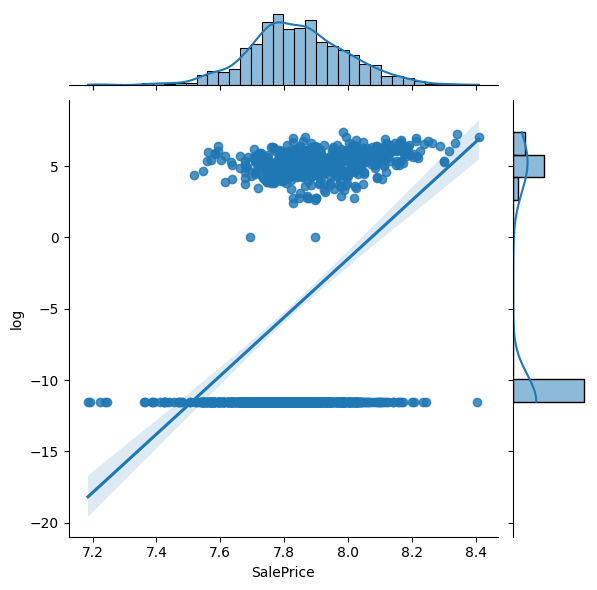

reciprocal


/home/nami/feature-engineering-for-machine-learning/.venv/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1577: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


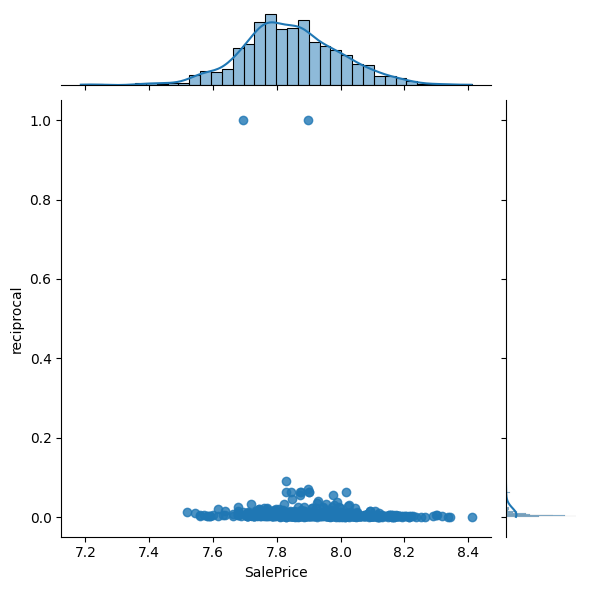

squareroot


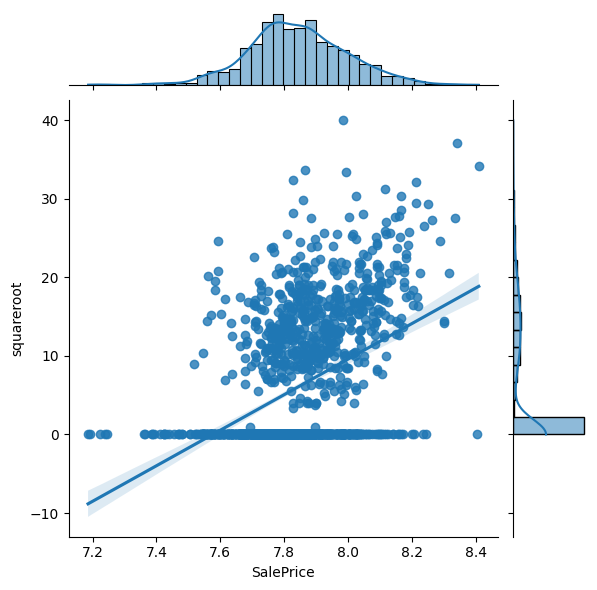

exponential


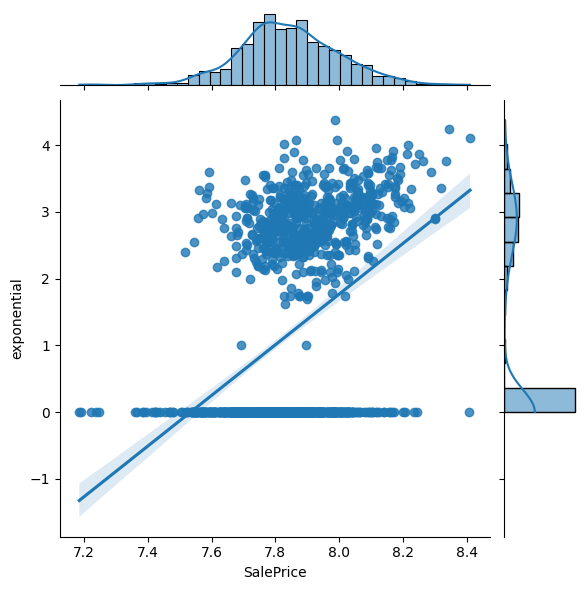

boxcox


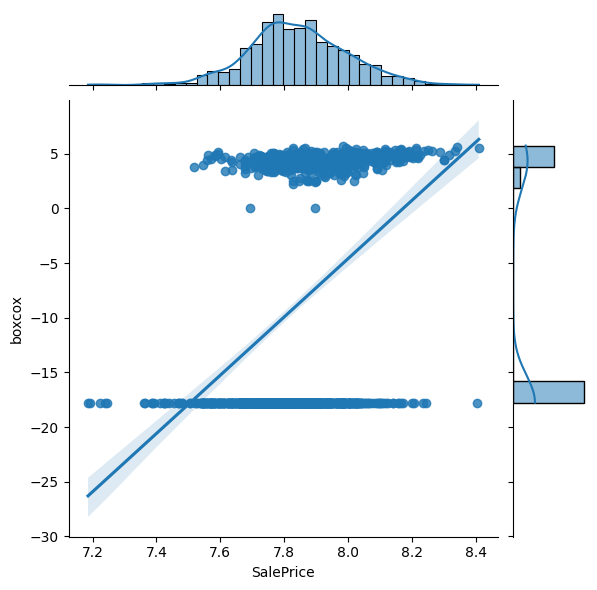

yeojohnson


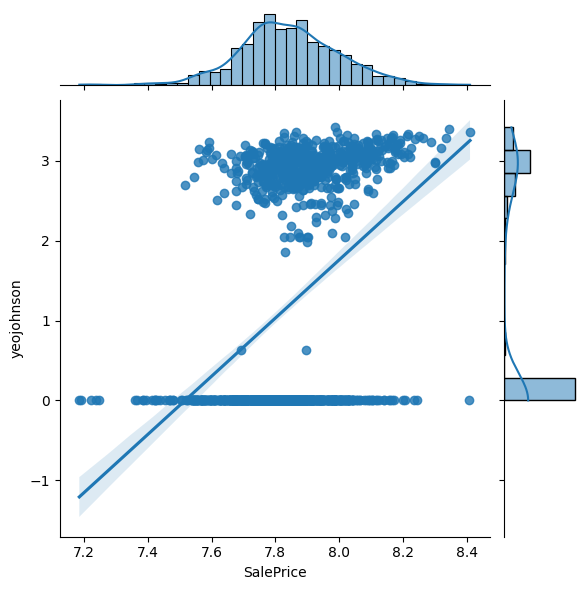

no_outliers


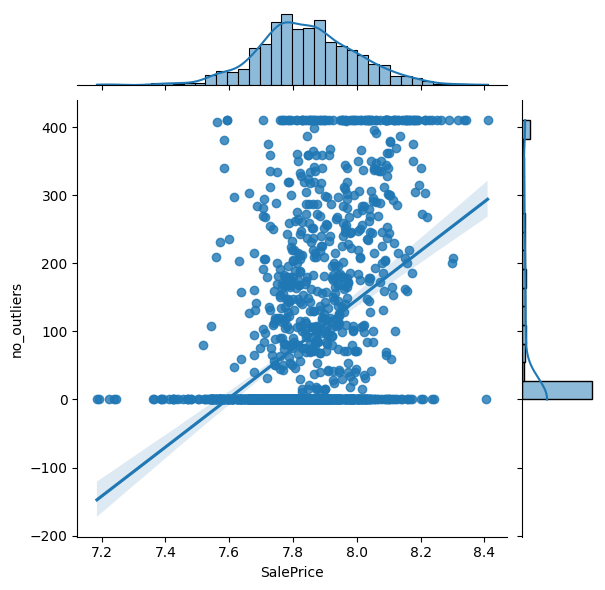

discretize


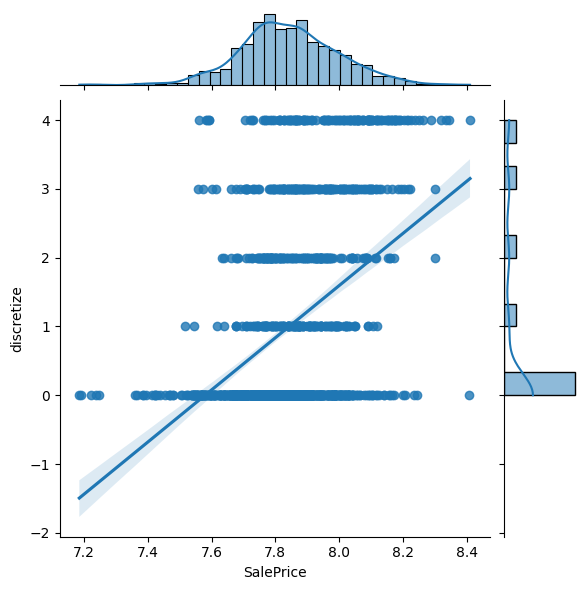

discretize_encode


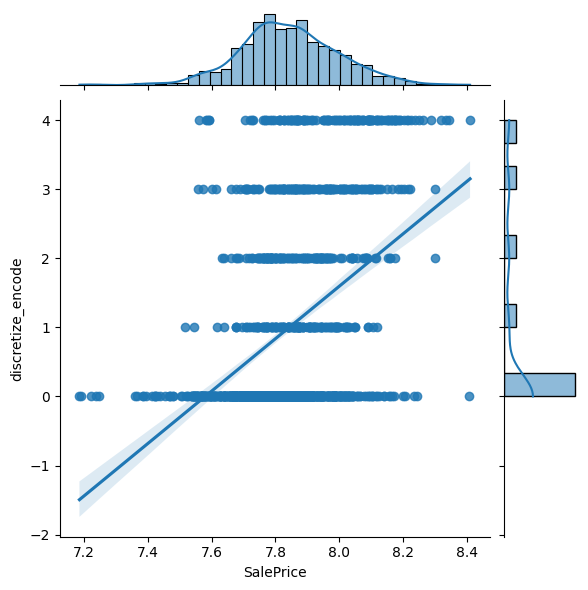

binarize


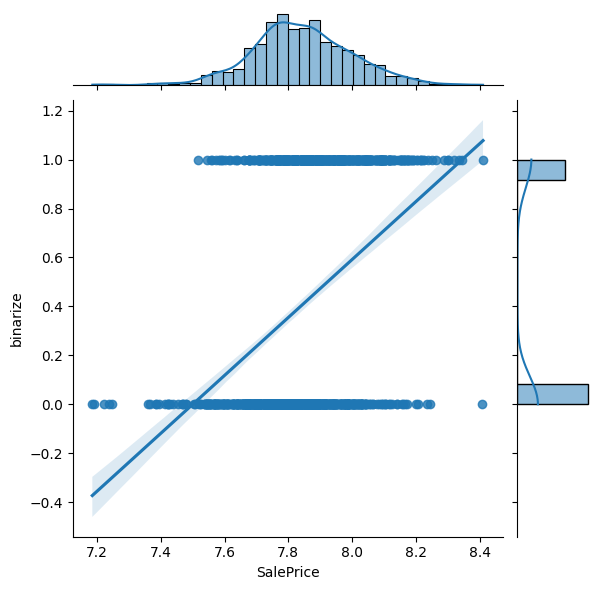

BsmtFinSF1
   BsmtFinSF1  SalePrice       log  reciprocal  squareroot  exponential  \
0         706   7.932608  6.559615    0.001416   26.570661     3.713308   
1         978   7.878261  6.885510    0.001022   31.272992     3.963399   
2         486   7.959616  6.186209    0.002058   22.045408     3.446095   
3         216   7.774953  5.375278    0.004630   14.696938     2.930156   
4         655   8.002872  6.484635    0.001527   25.592968     3.658038   

      boxcox  yeojohnson  no_outliers  discretize  discretize_encode  binarize  
0   9.953254   15.235368        706.0           4                  4         1  
1  10.680439   16.750863        978.0           5                  5         1  
2   9.154101   13.632899        486.0           2                  2         1  
3   7.536529   10.593524        216.0           0                  1         1  
4   9.789913   14.902456        655.0           3                  3         1  
SalePrice            1.000000
no_outliers          0

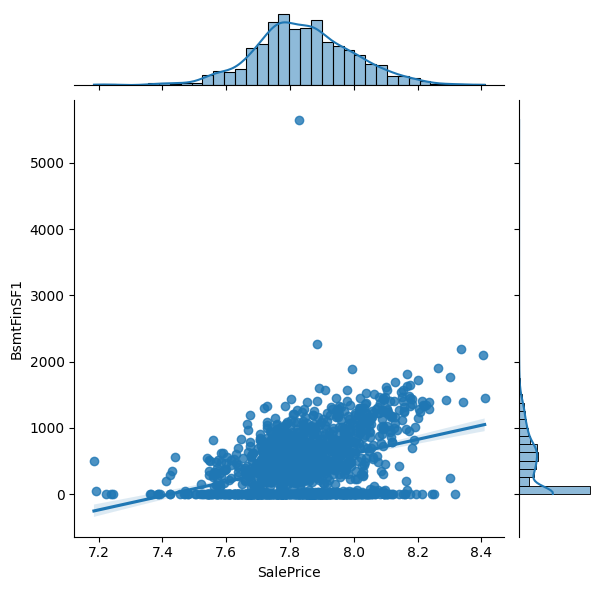

SalePrice


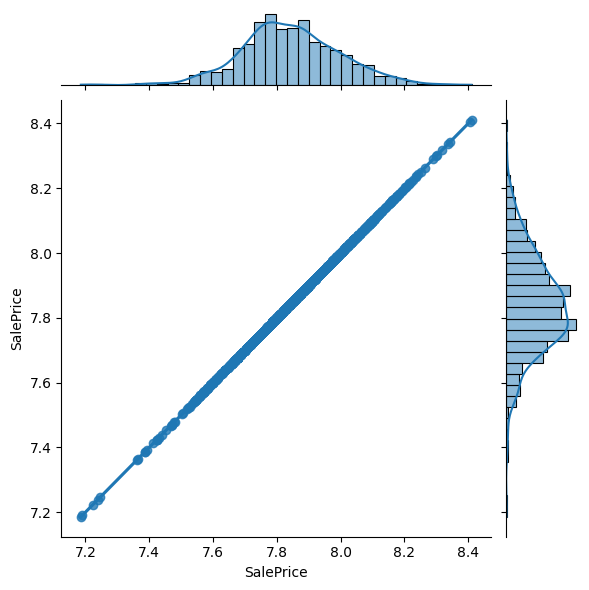

log


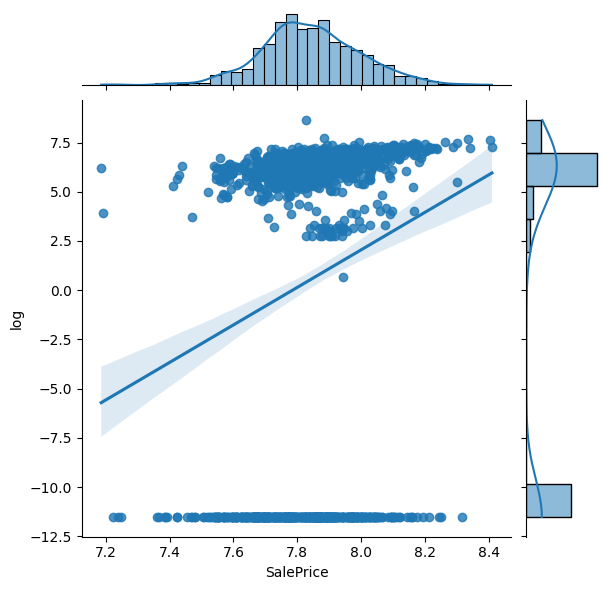

reciprocal


/home/nami/feature-engineering-for-machine-learning/.venv/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1577: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


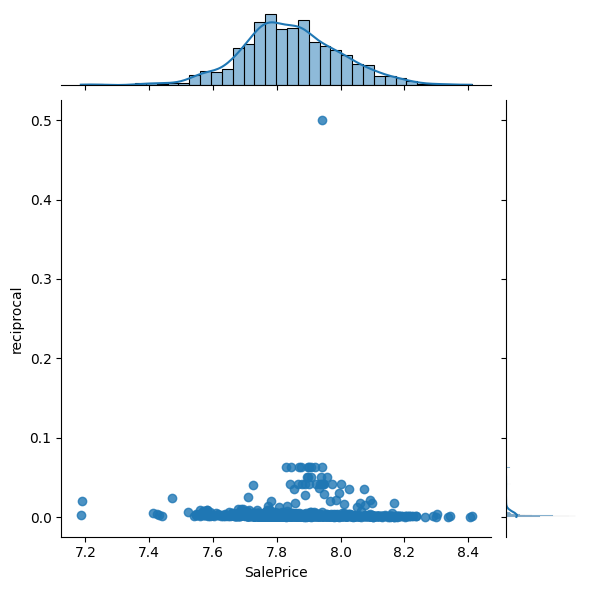

squareroot


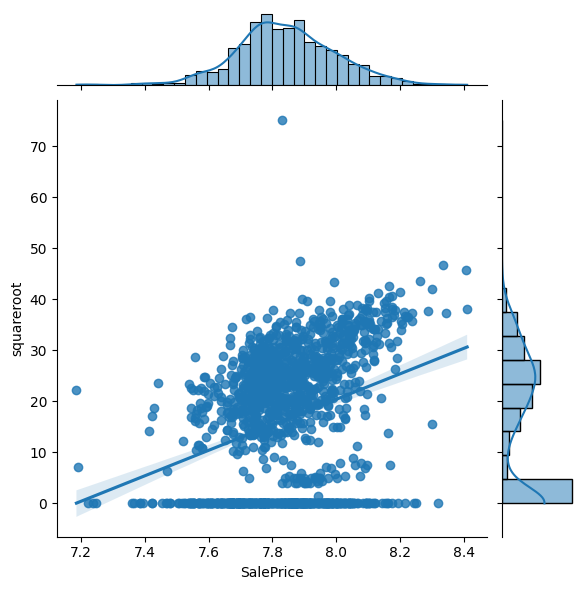

exponential


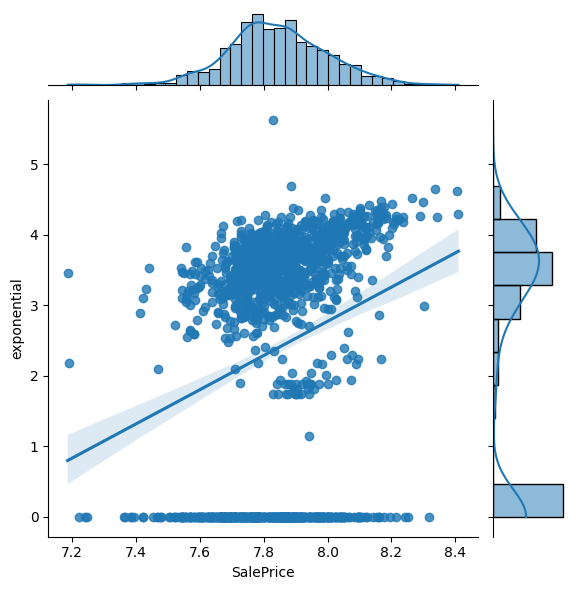

boxcox


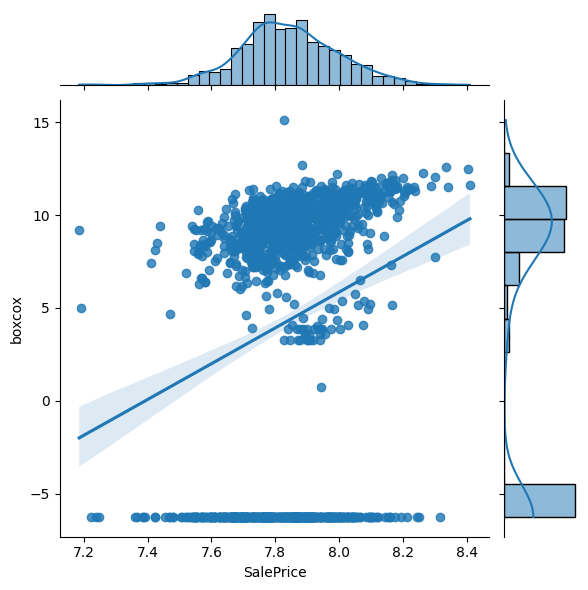

yeojohnson


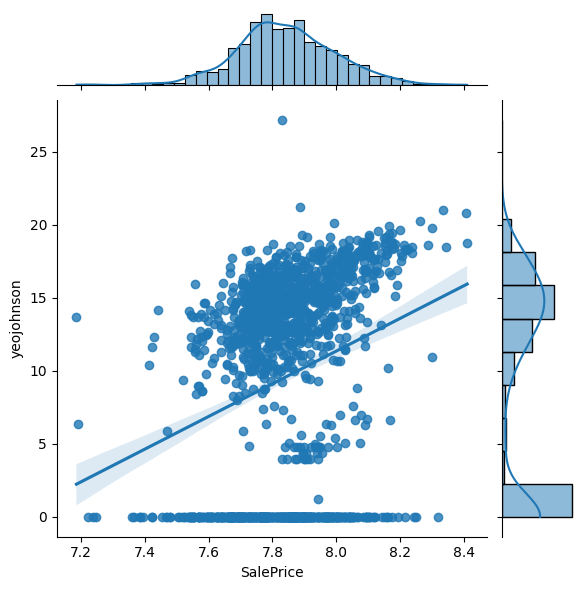

no_outliers


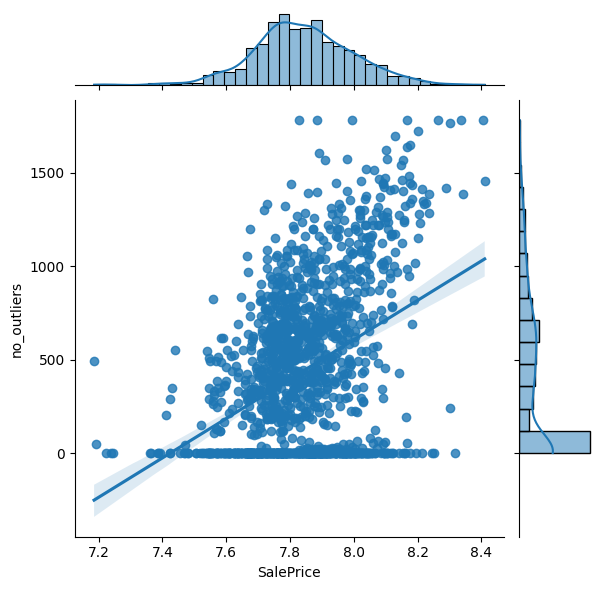

discretize


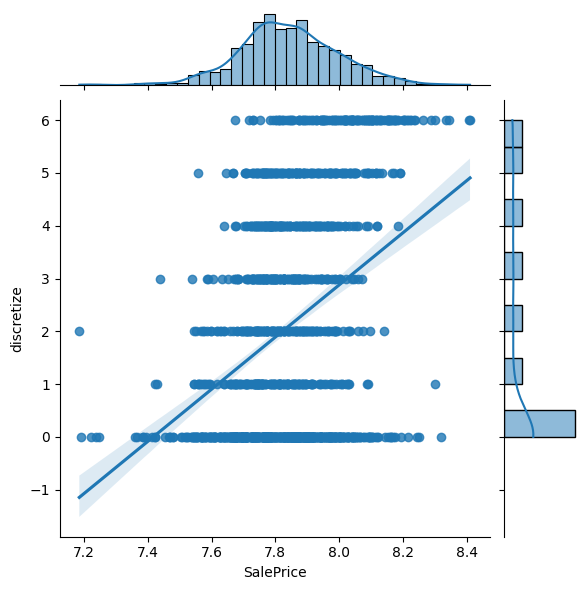

discretize_encode


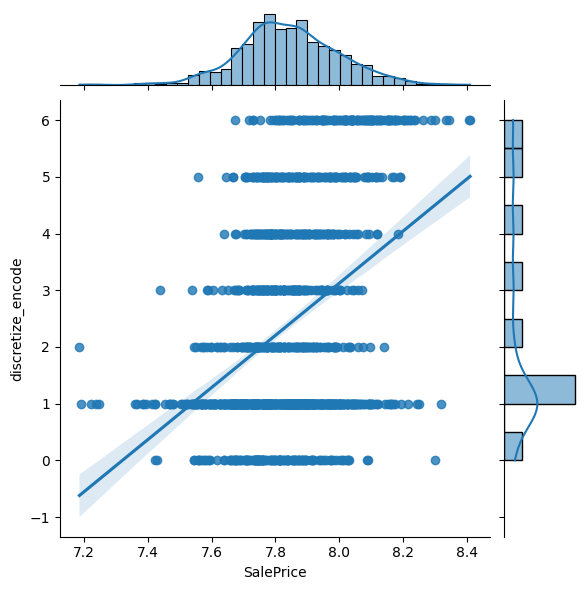

binarize


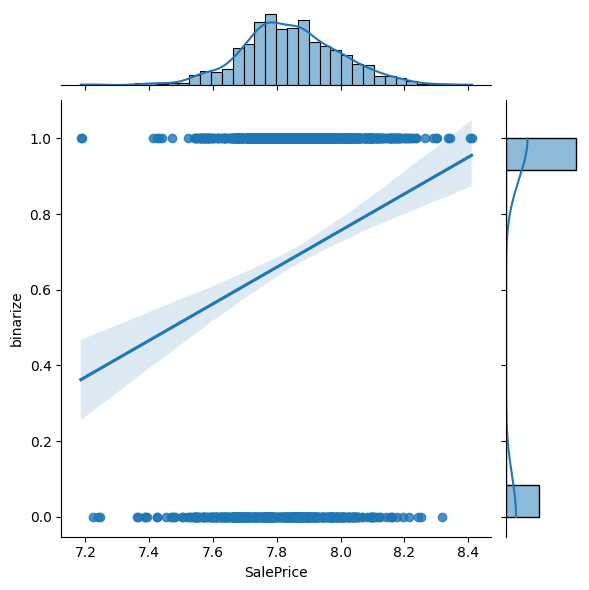

BsmtFinSF2


ValueError: Input columns ['x0'] have low variation for method 'iqr'. Try other capping methods or drop these columns.

In [12]:
for col in numerical:
    print(col)
    correlation_transformed(data, col)

SalePrice


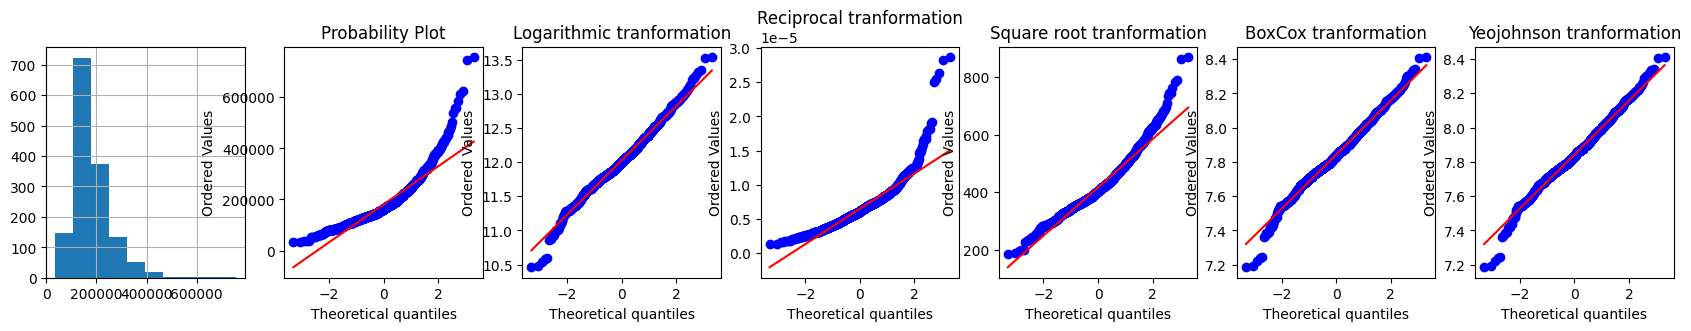

LotFrontage


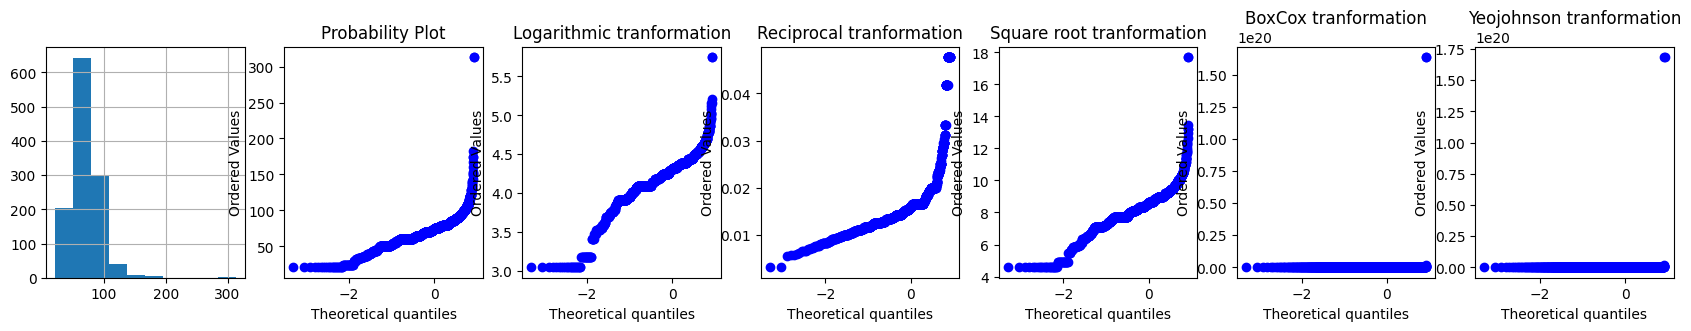

LotArea


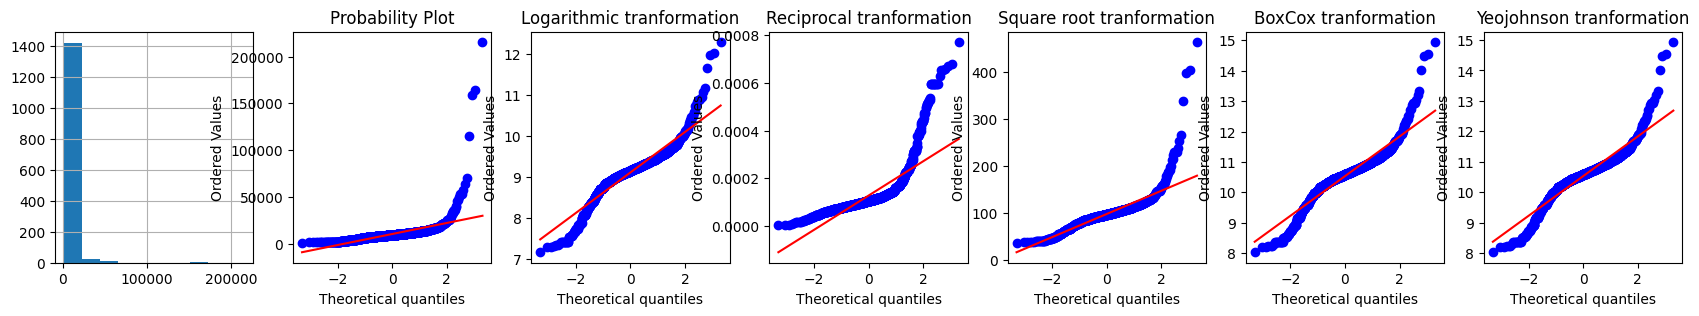

MasVnrArea


/home/nami/feature-engineering-for-machine-learning/.venv/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


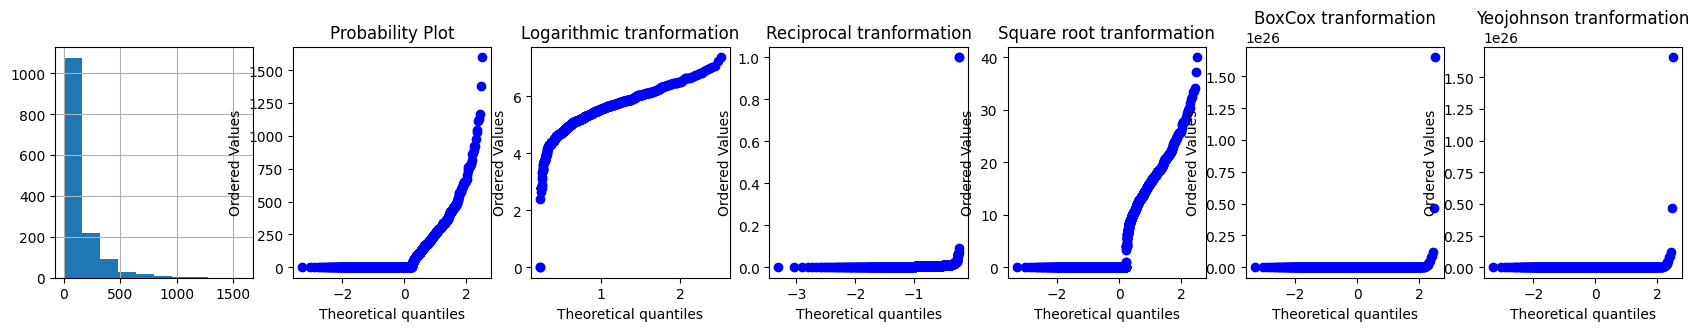

BsmtFinSF1


/home/nami/feature-engineering-for-machine-learning/.venv/lib/python3.9/site-packages/numpy/lib/function_base.py:2699: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


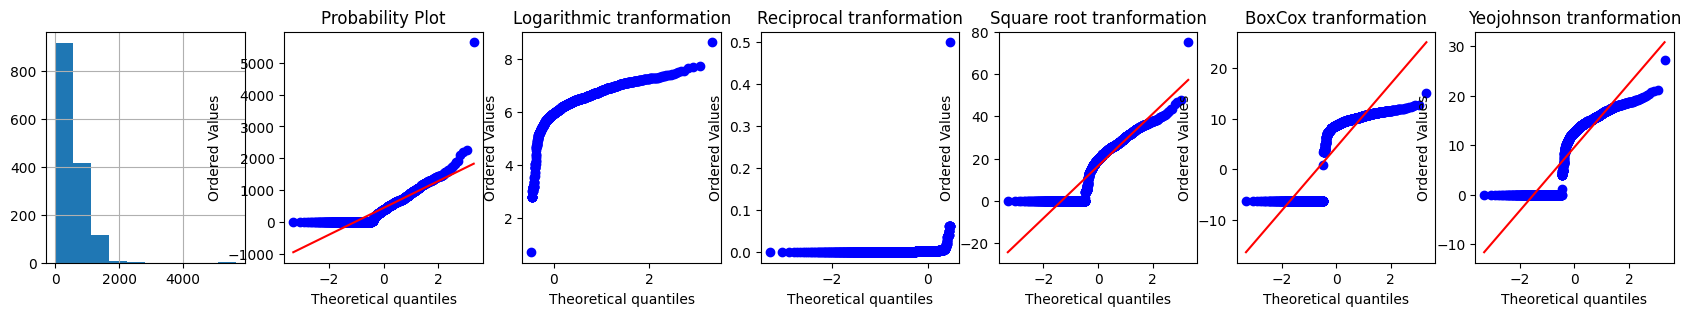

BsmtFinSF2


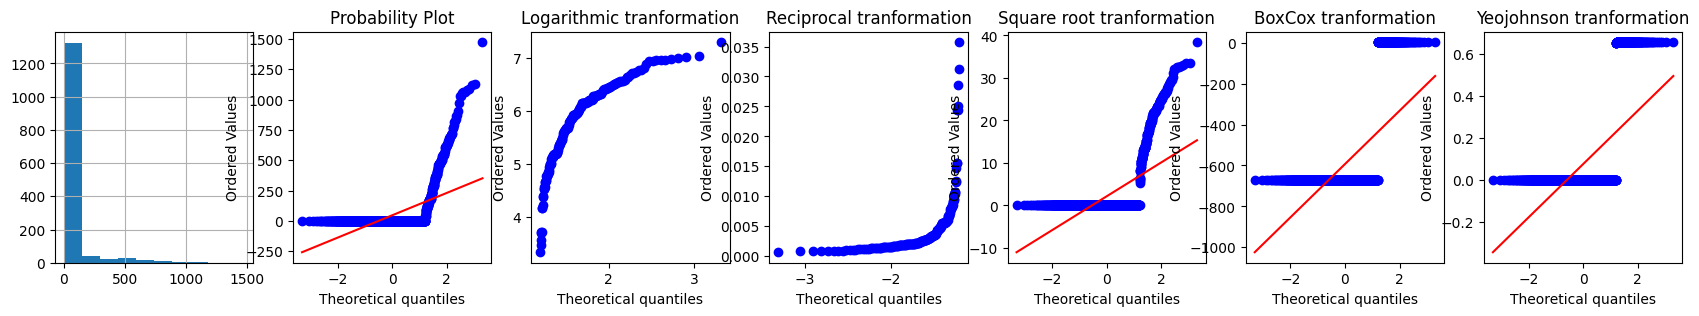

BsmtUnfSF


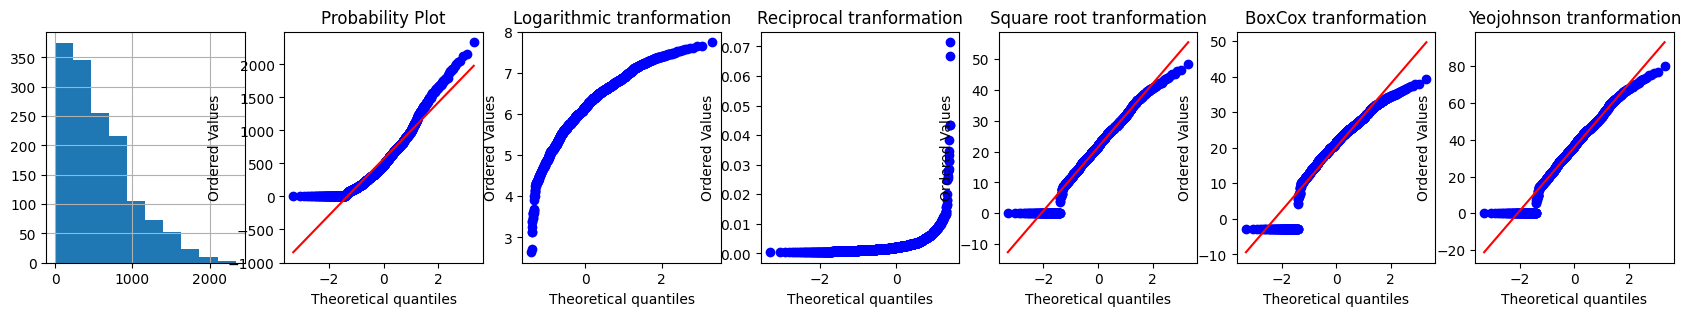

TotalBsmtSF


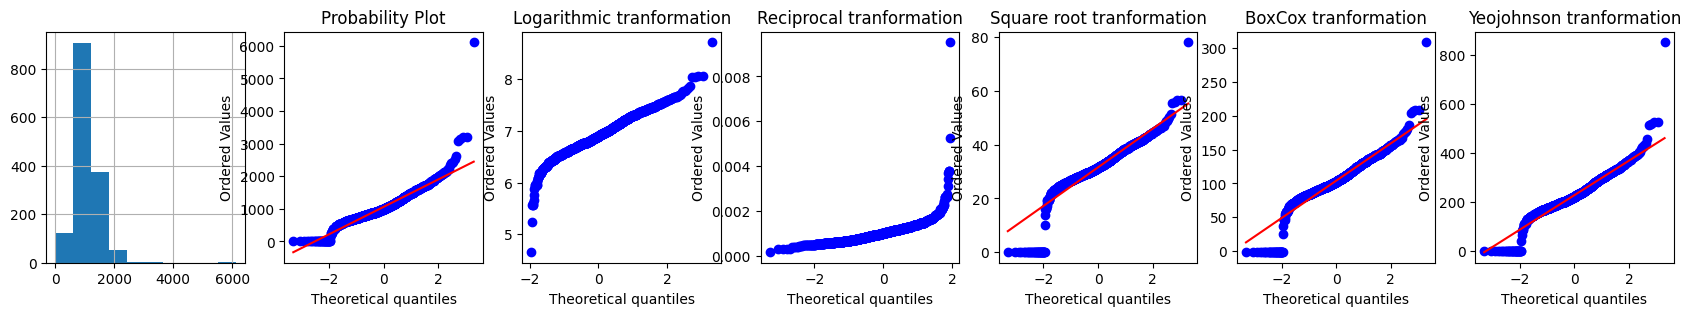

1stFlrSF


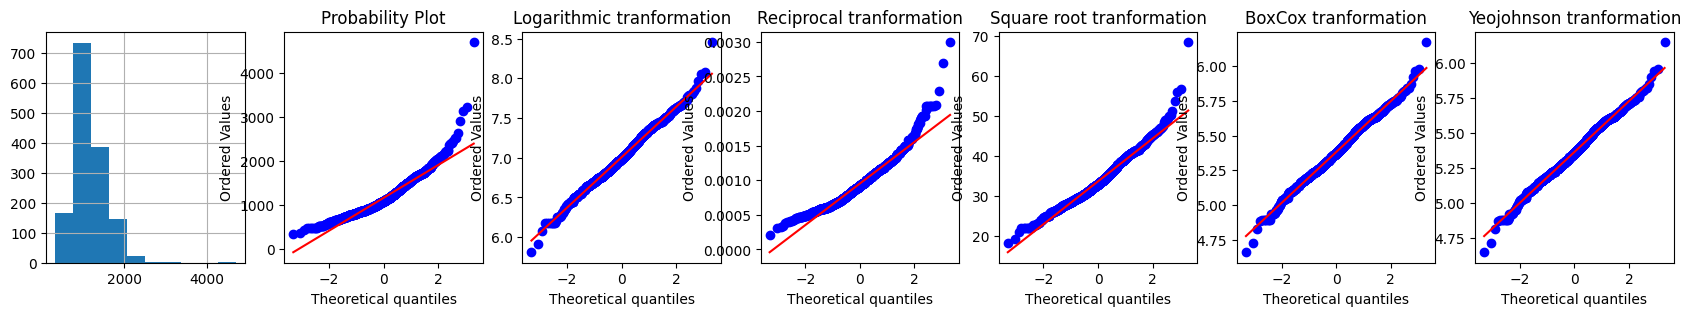

2ndFlrSF


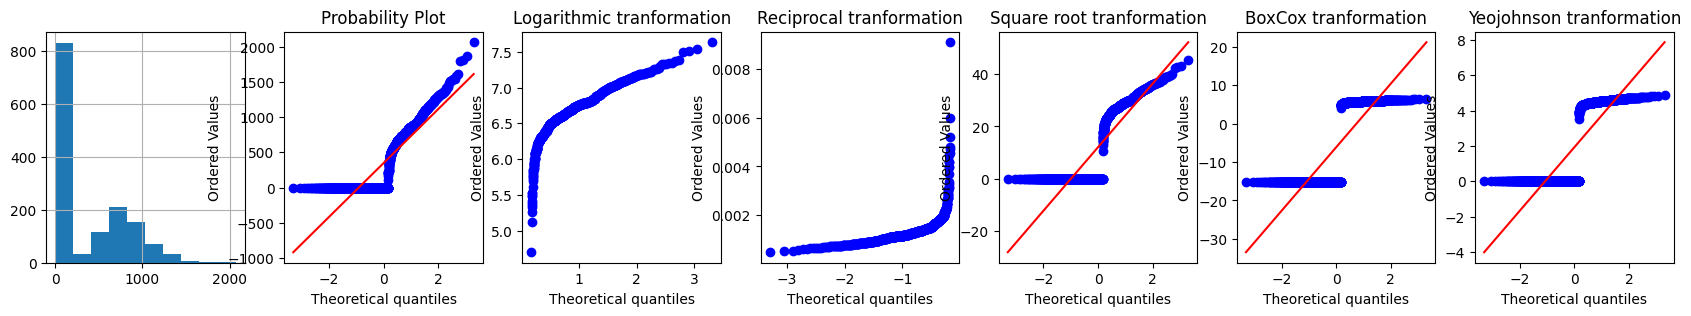

LowQualFinSF


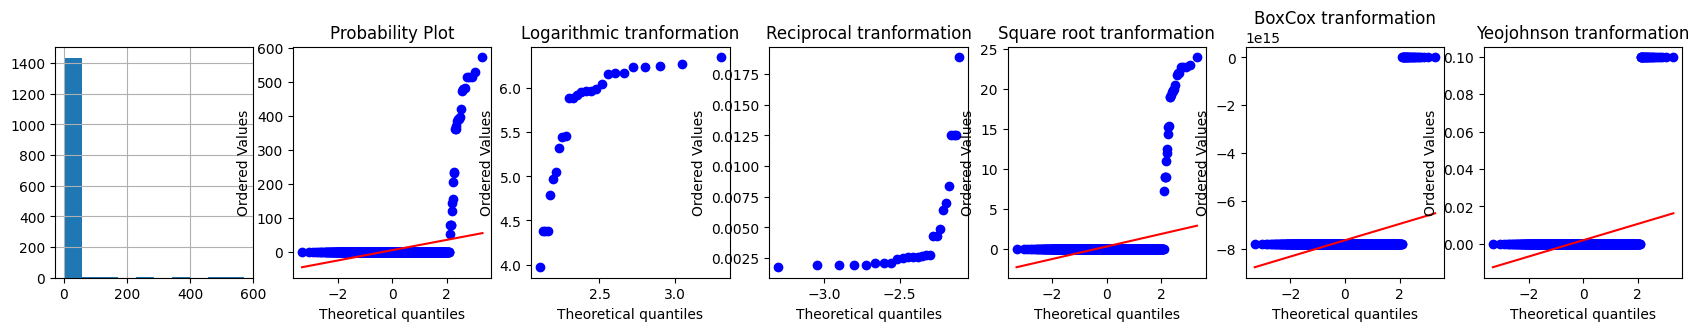

GrLivArea


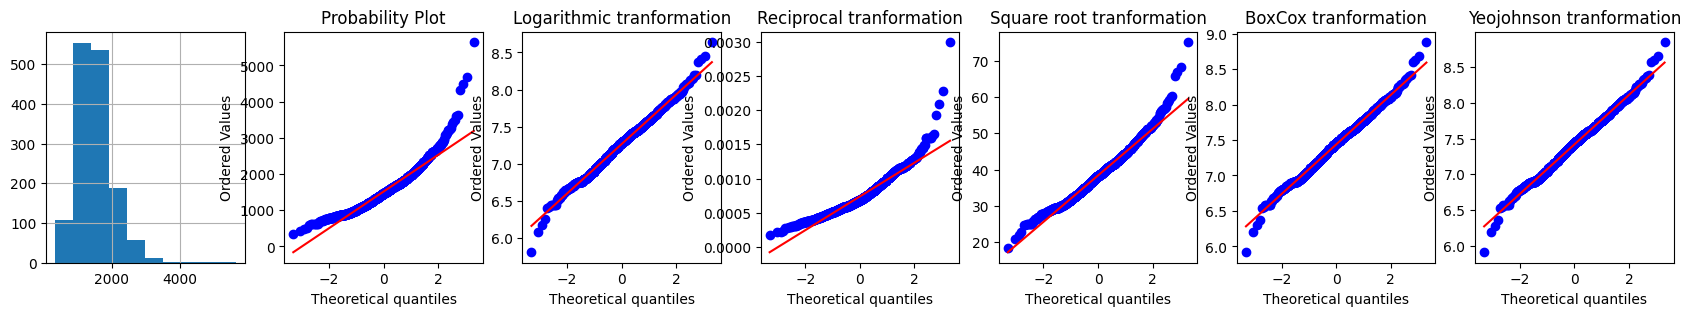

GarageArea


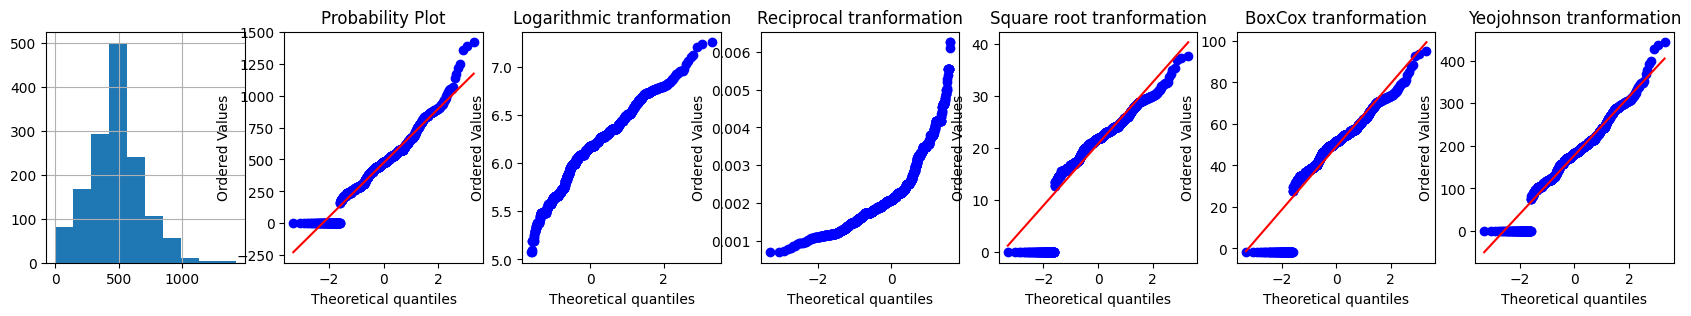

WoodDeckSF


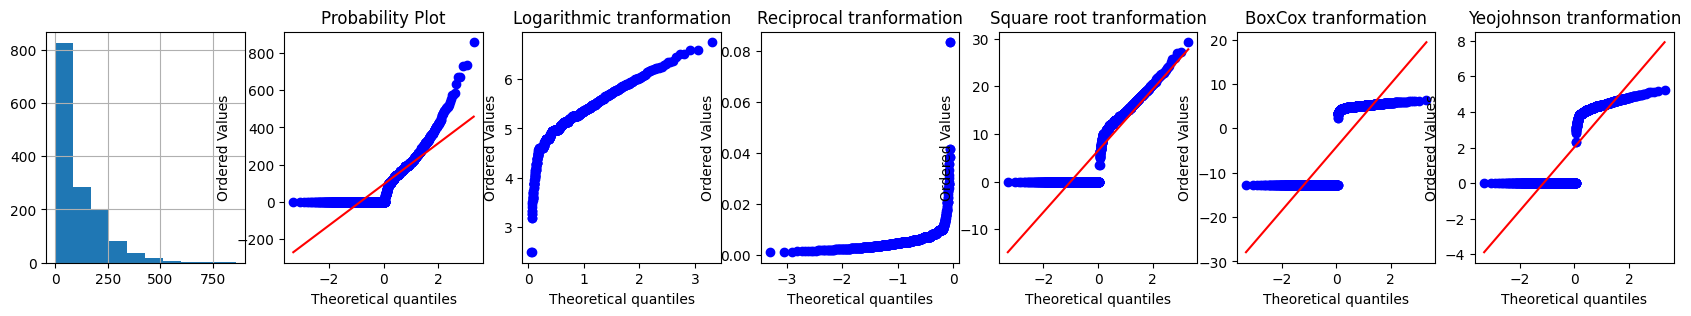

OpenPorchSF


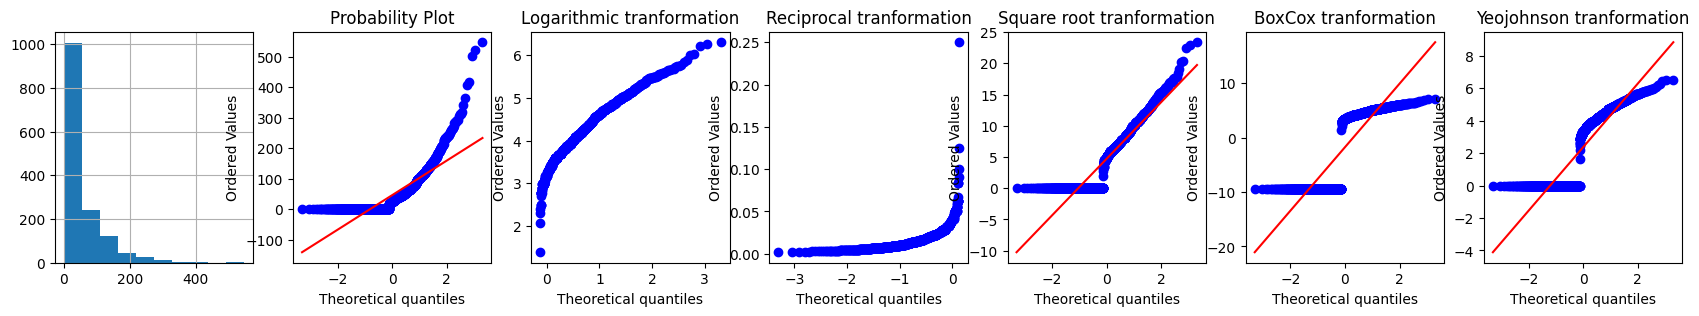

EnclosedPorch


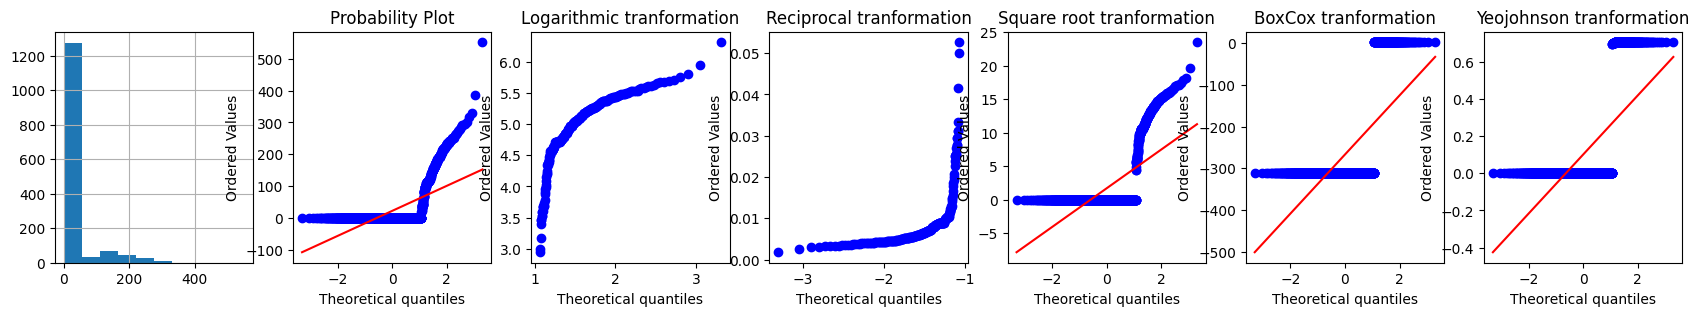

3SsnPorch


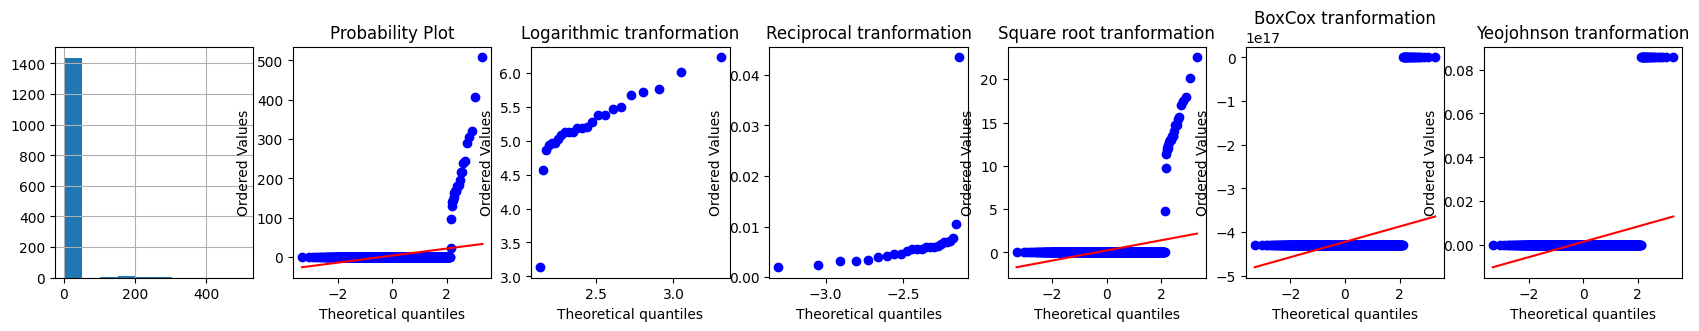

ScreenPorch


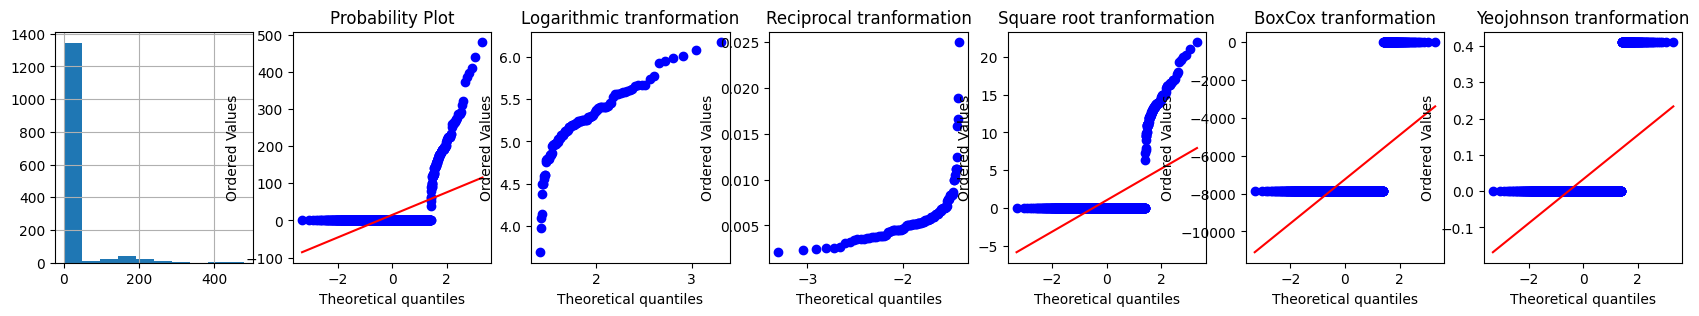

MiscVal


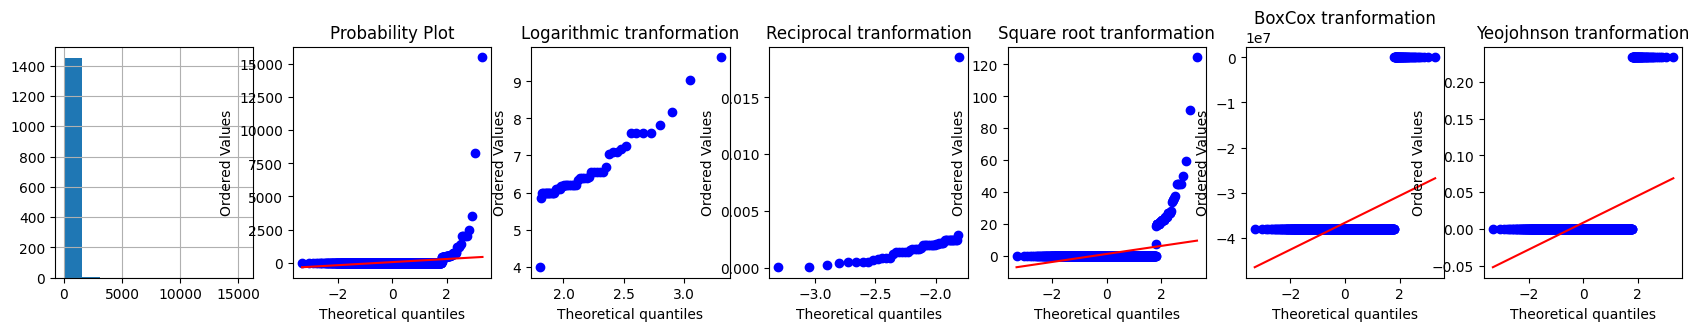

In [124]:
for var in ["SalePrice"] + numerical:
    transformations_plot(data, var)

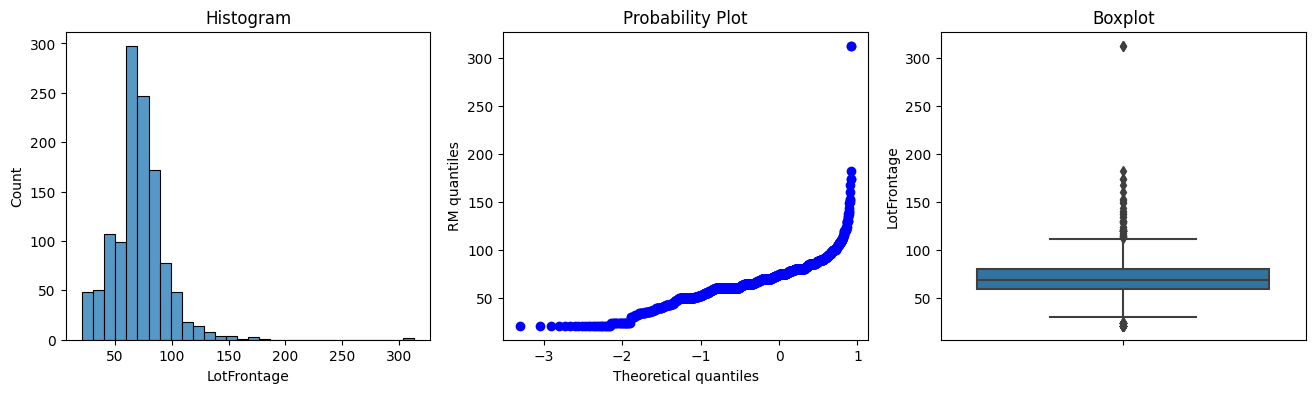

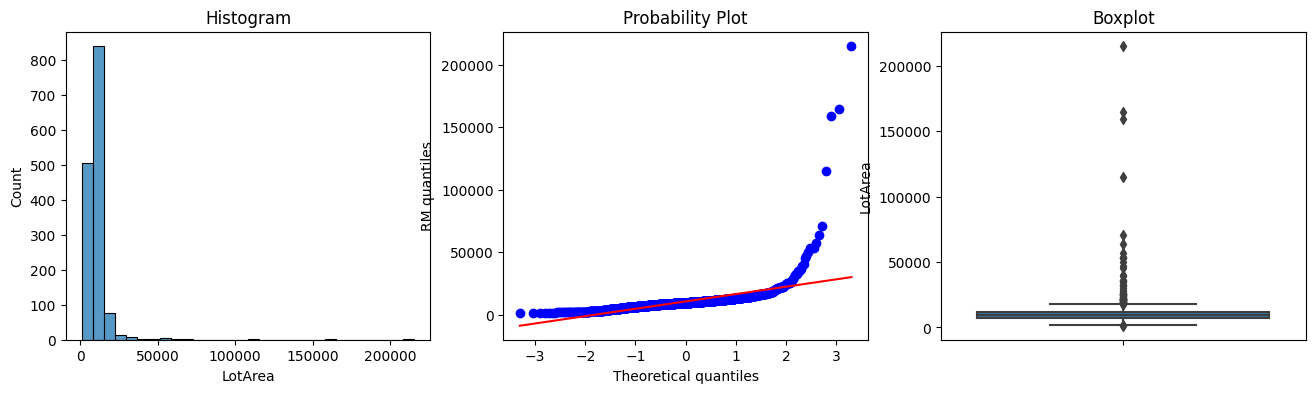

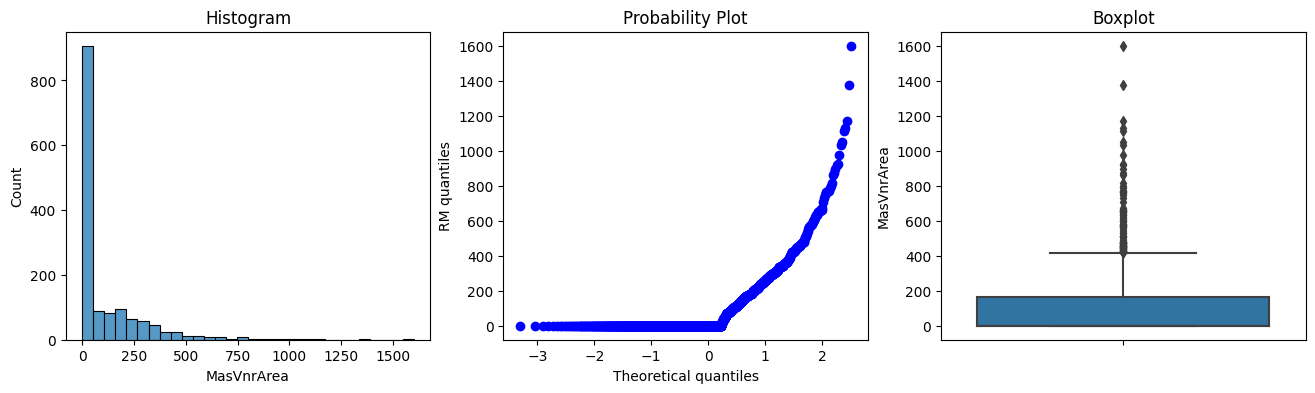

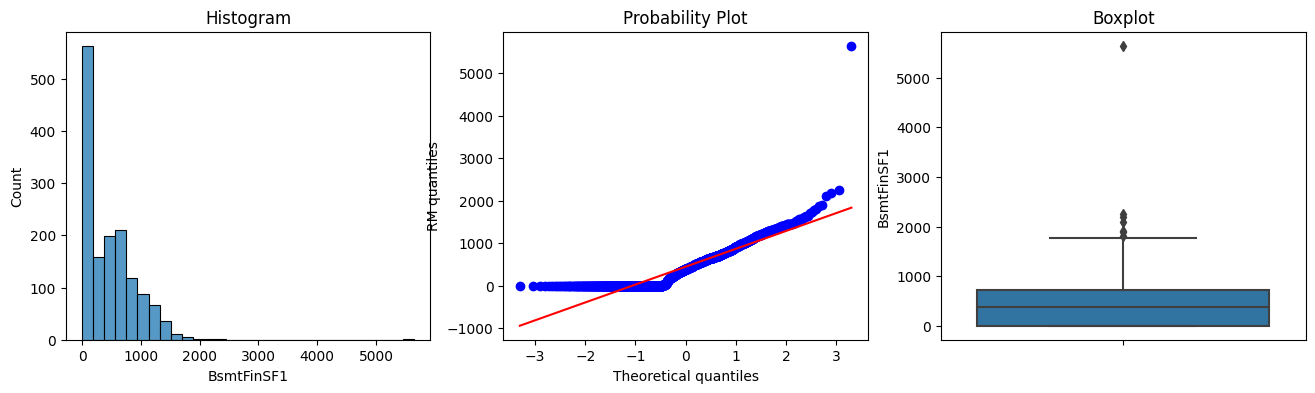

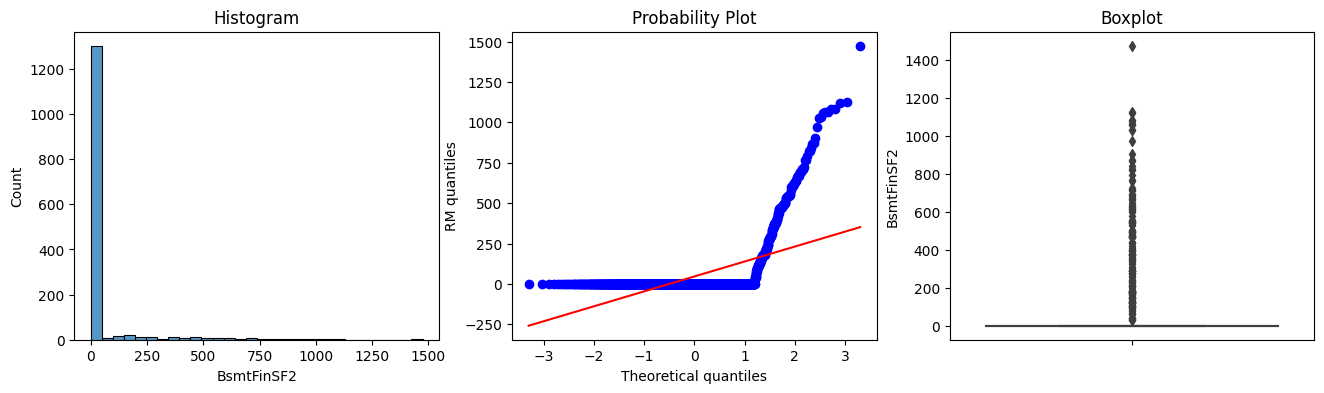

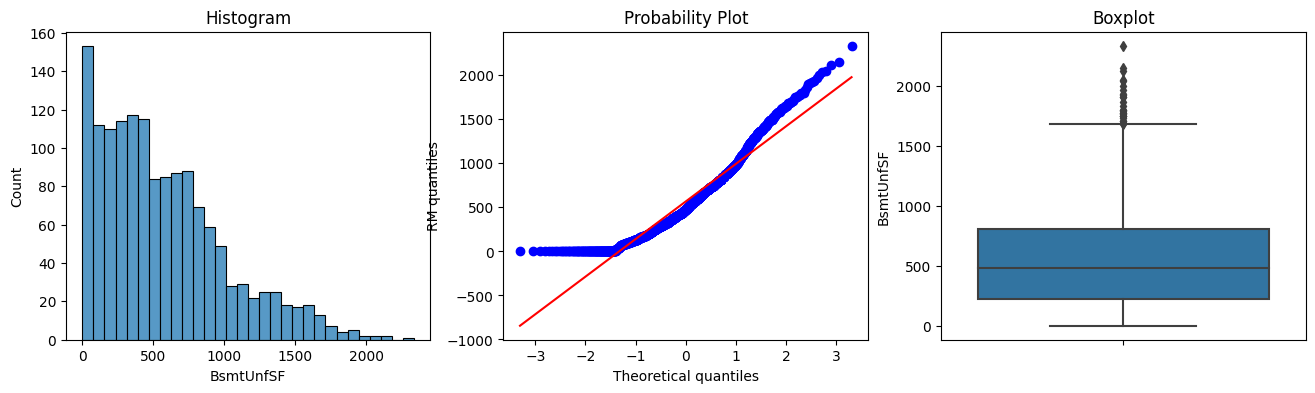

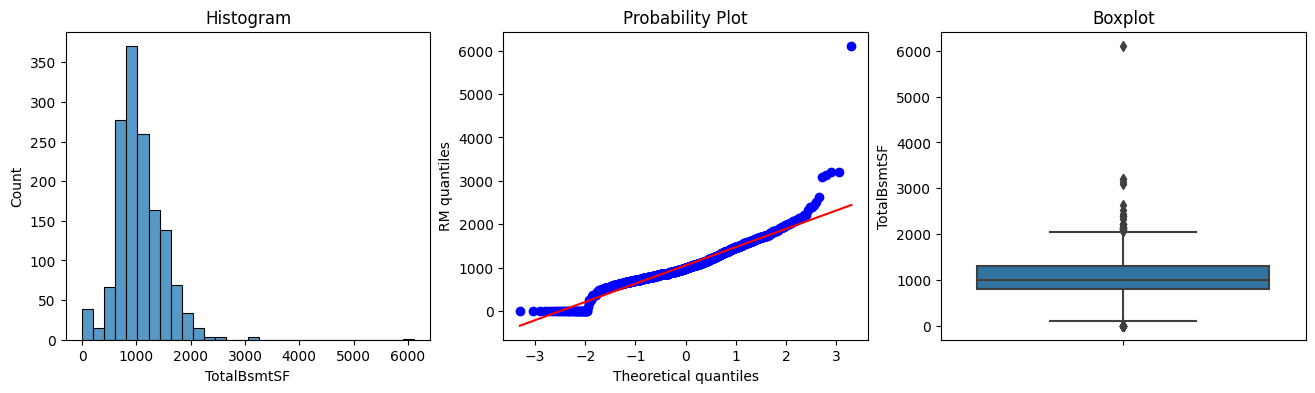

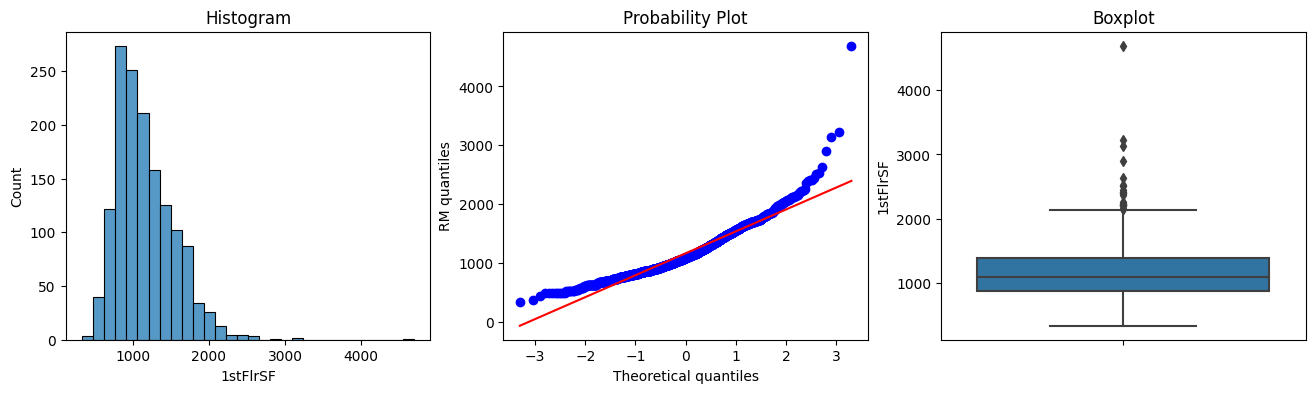

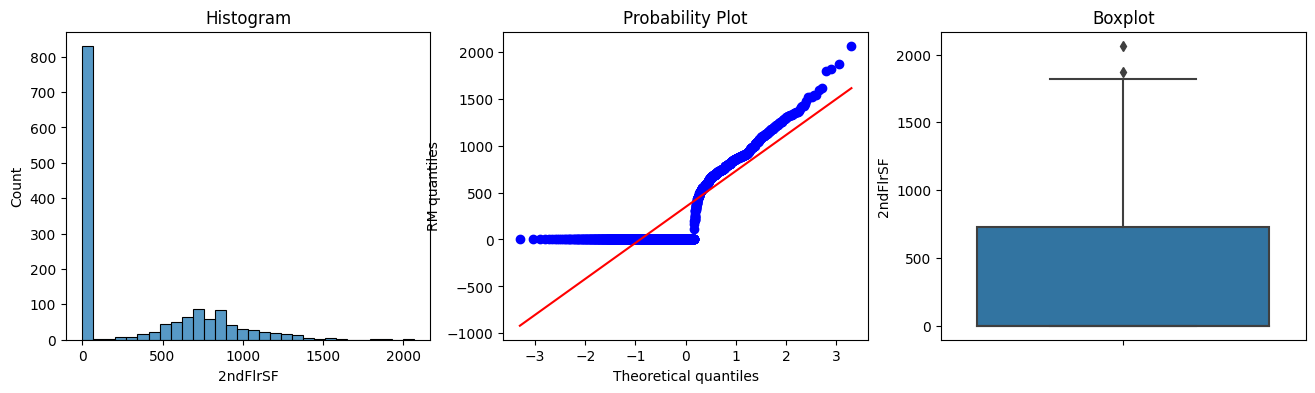

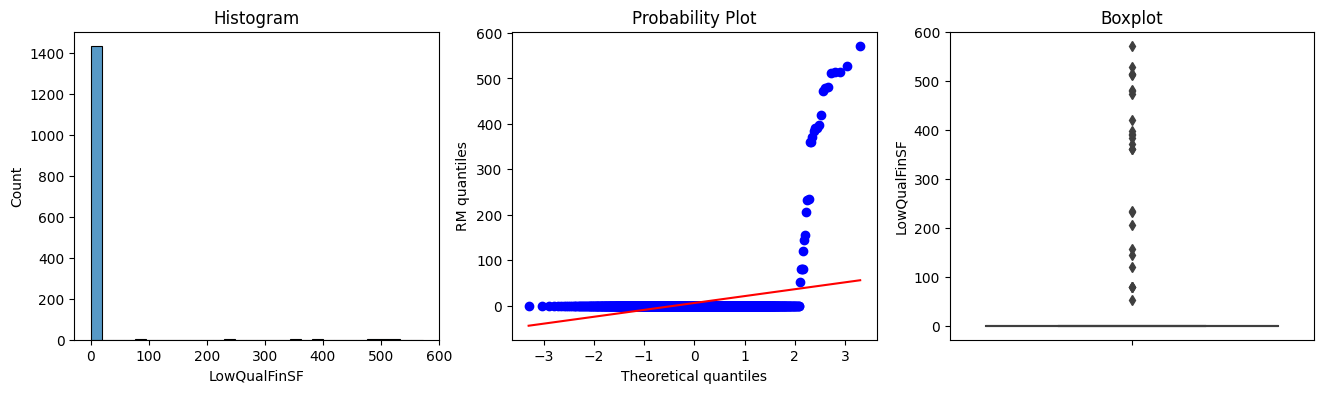

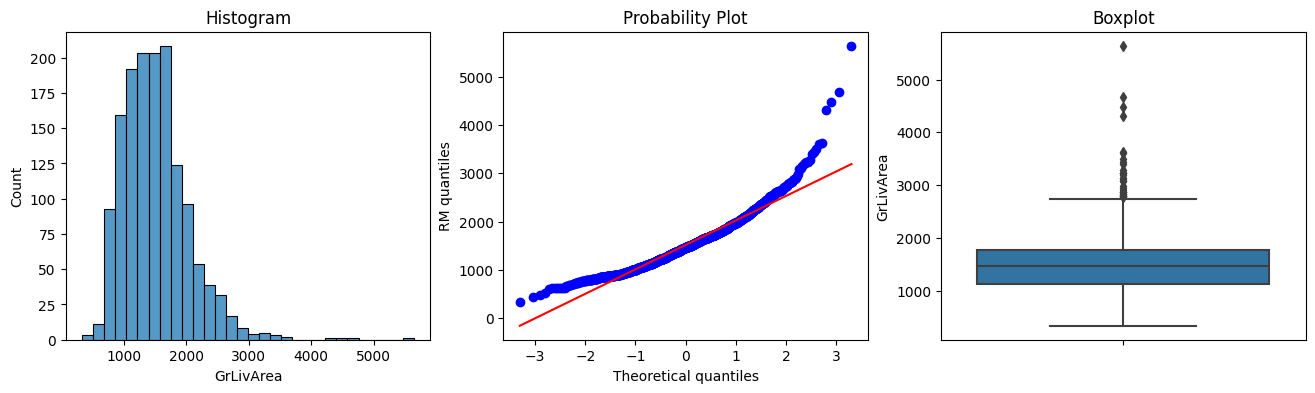

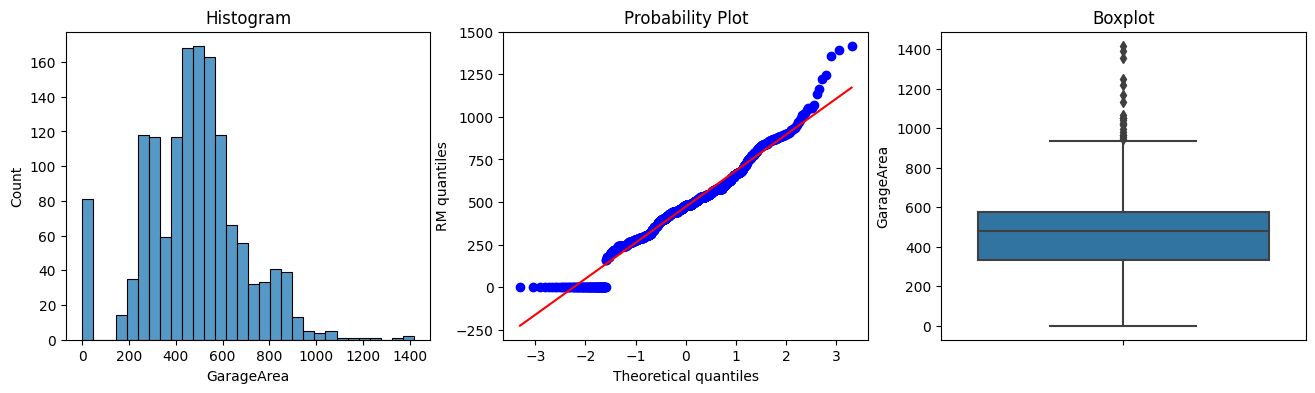

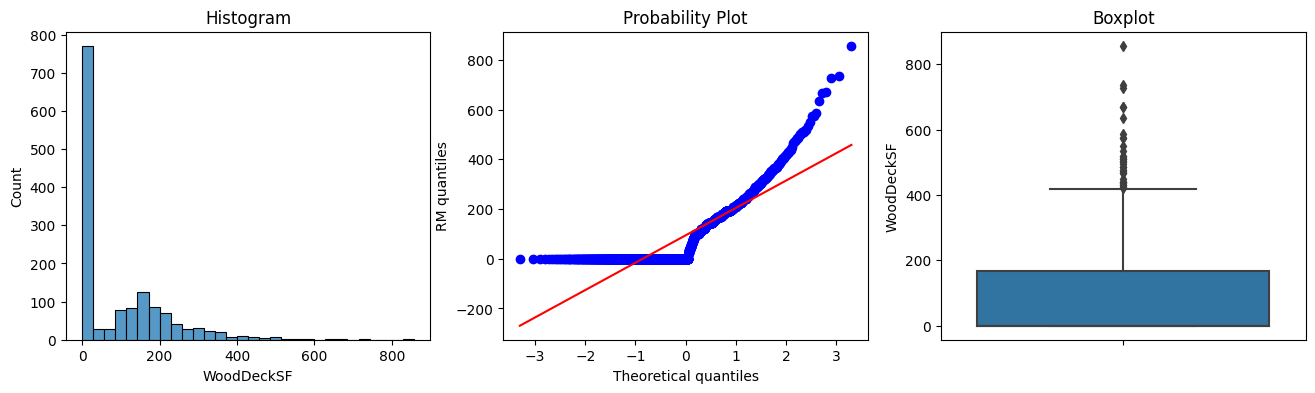

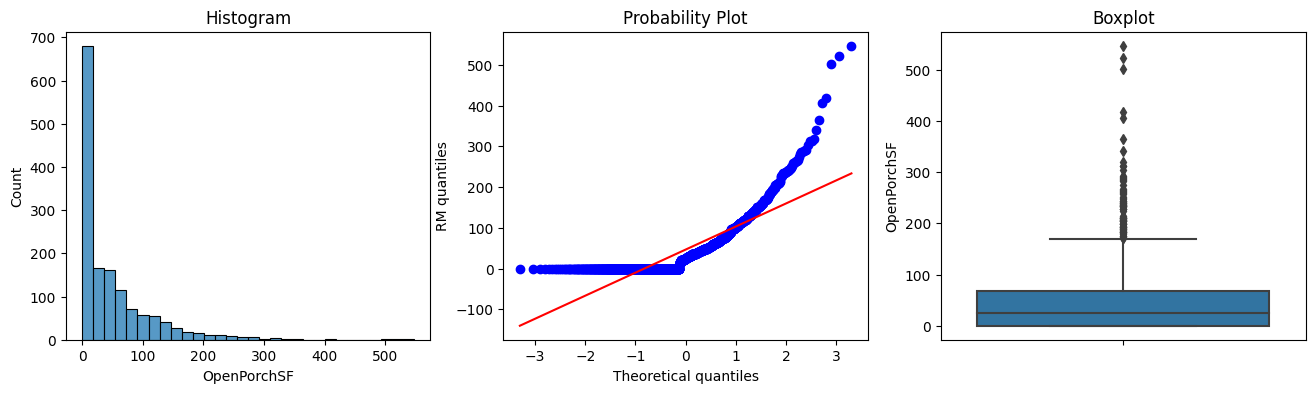

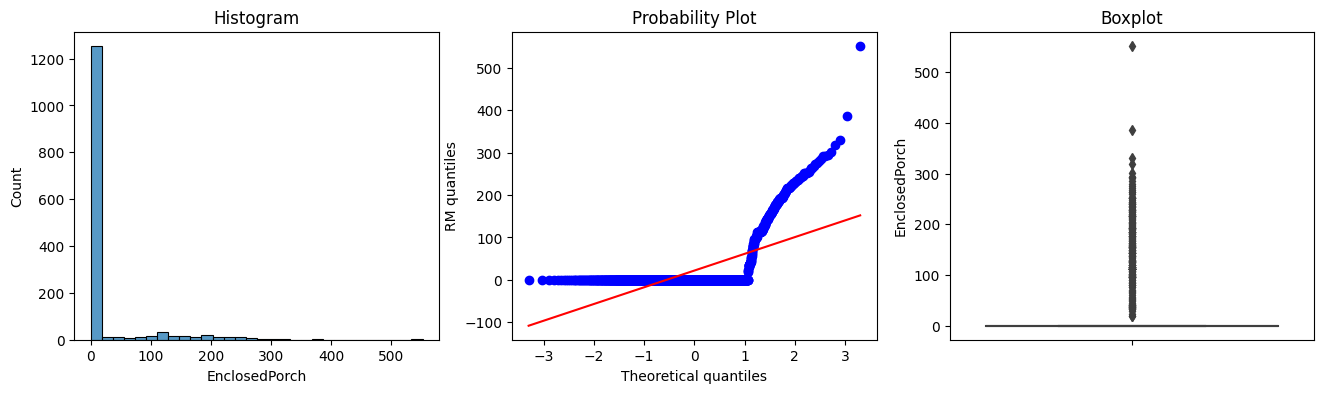

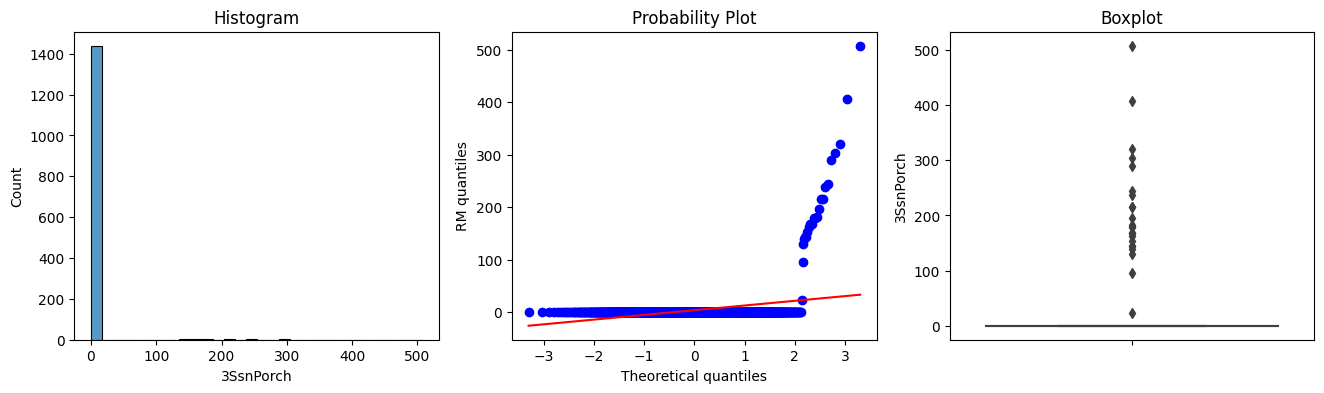

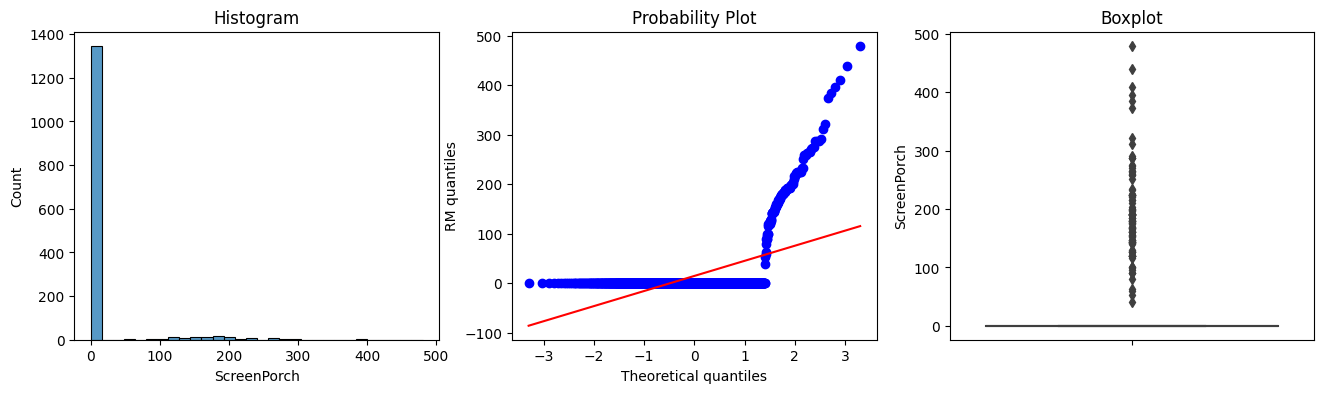

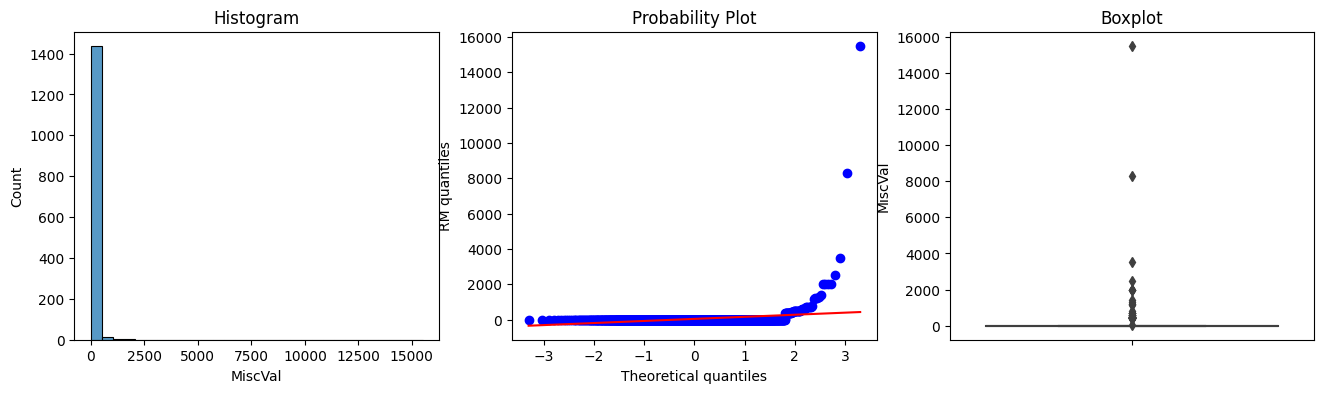

In [49]:
for var in numerical:
    diagnostic_plots(data, var)

<AxesSubplot: >

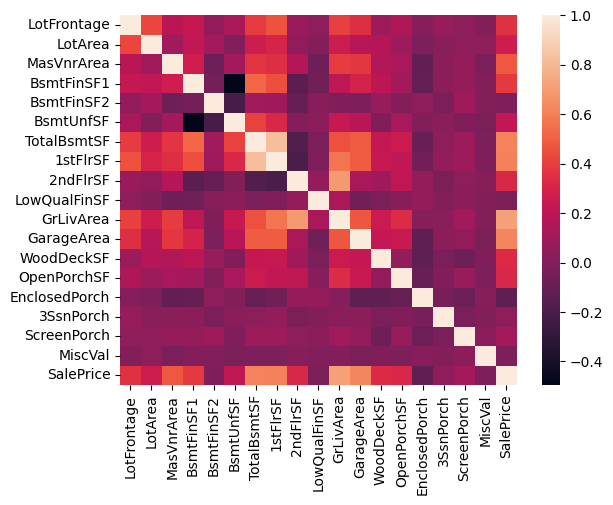

In [20]:
sns.heatmap(data[numerical + ["SalePrice"]].corr())

In [134]:
def correlation_plots(df, var):
    # The function takes a dataframe (df) and
    # the variable of interest as arguments.
    sns.jointplot(x=df['SalePrice'], y=df[var], kind="reg")
    plt.show()

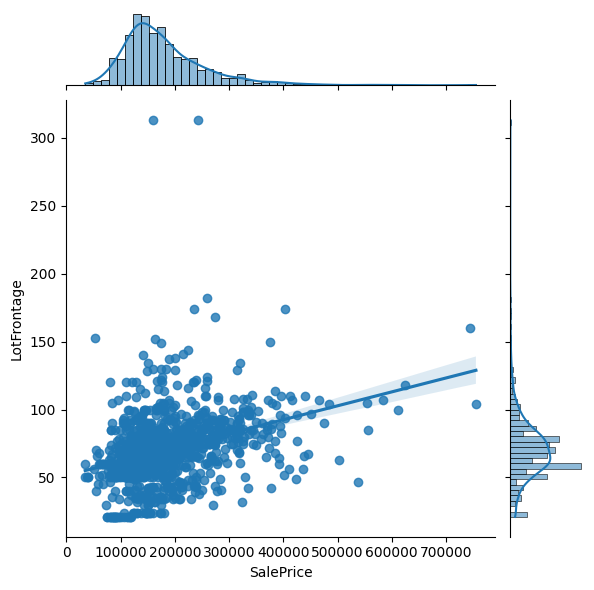

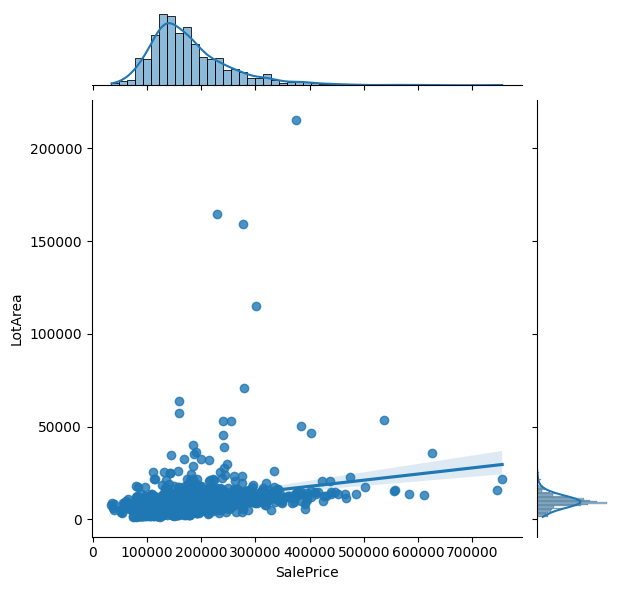

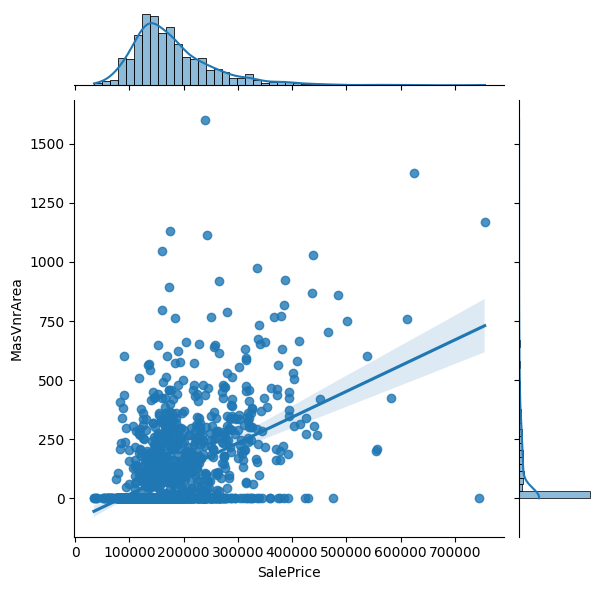

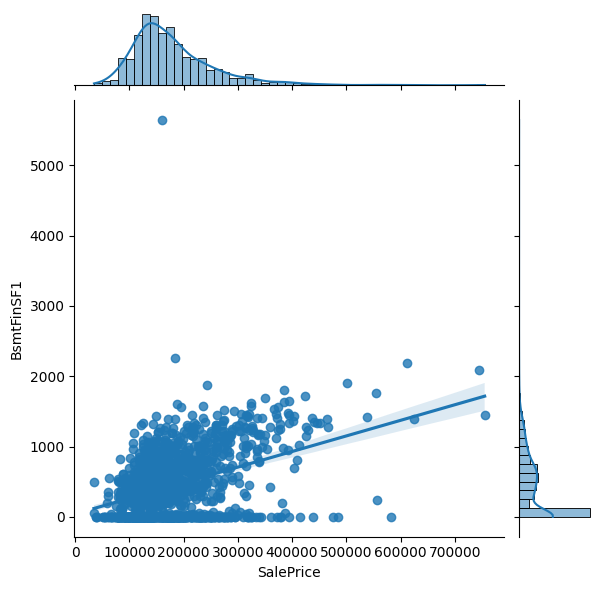

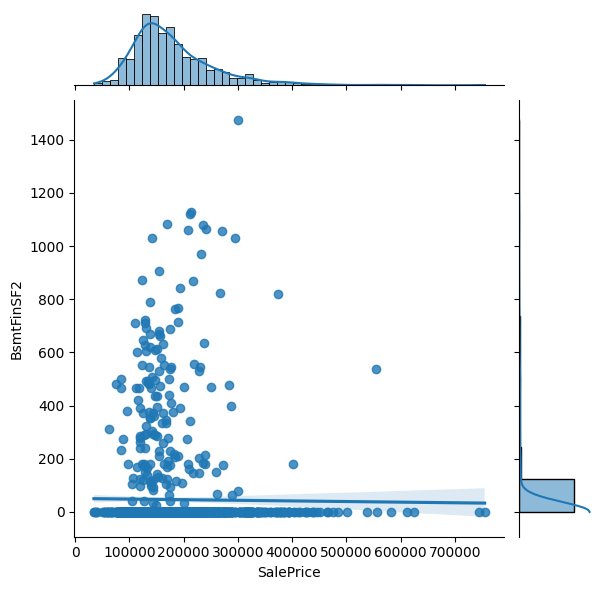

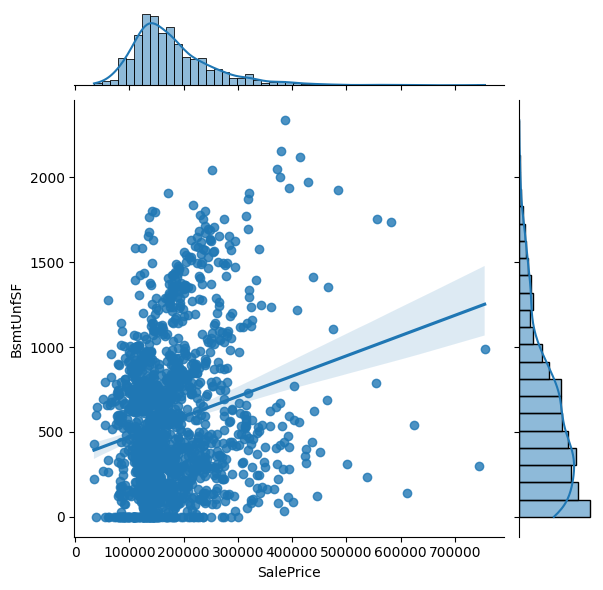

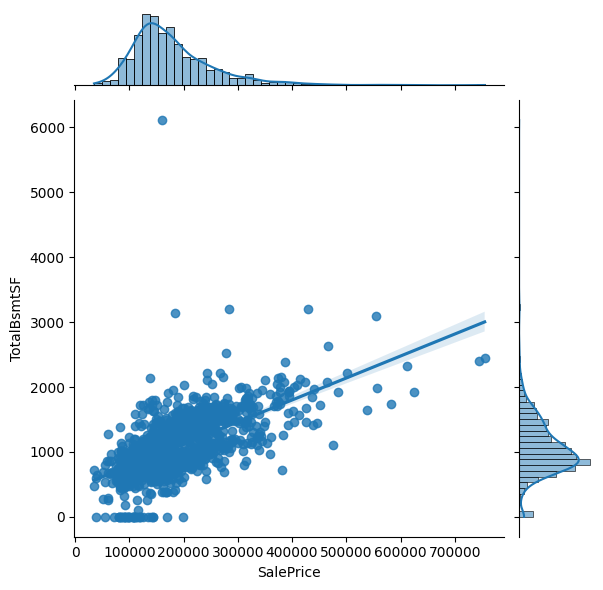

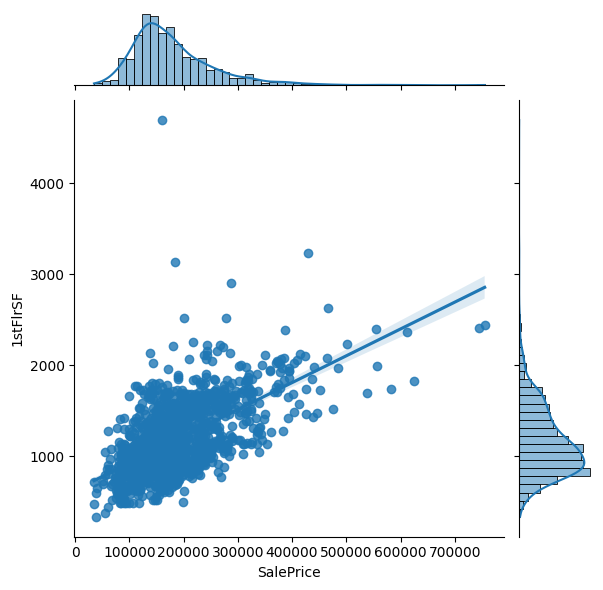

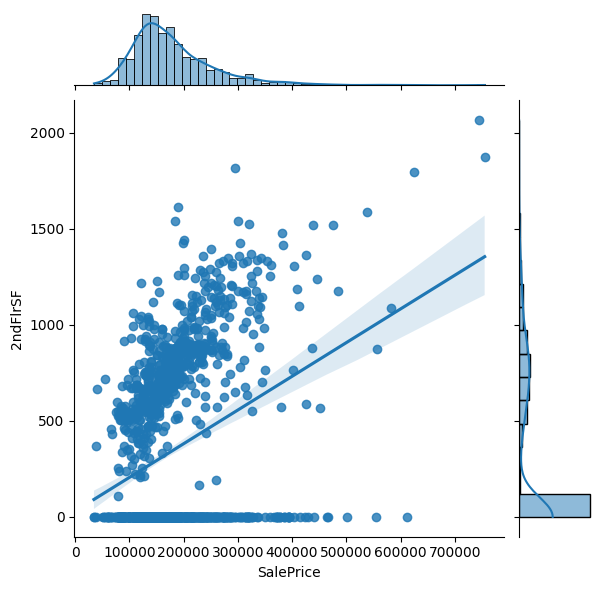

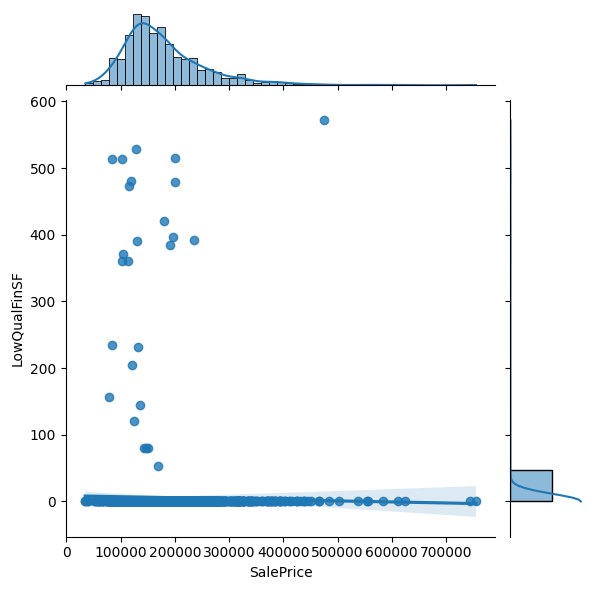

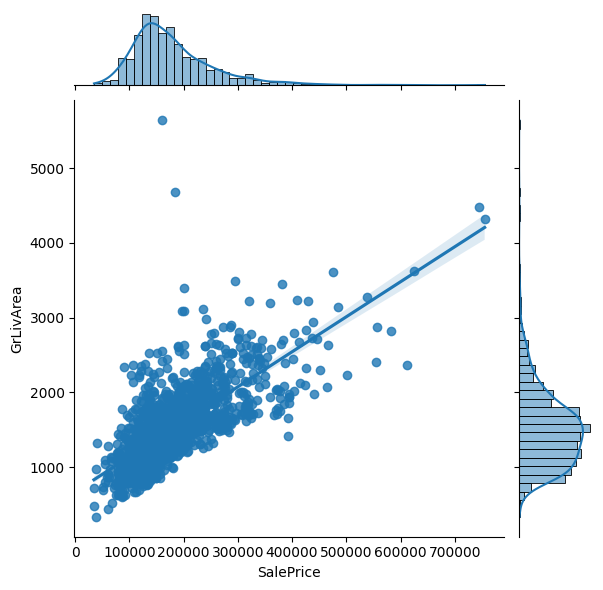

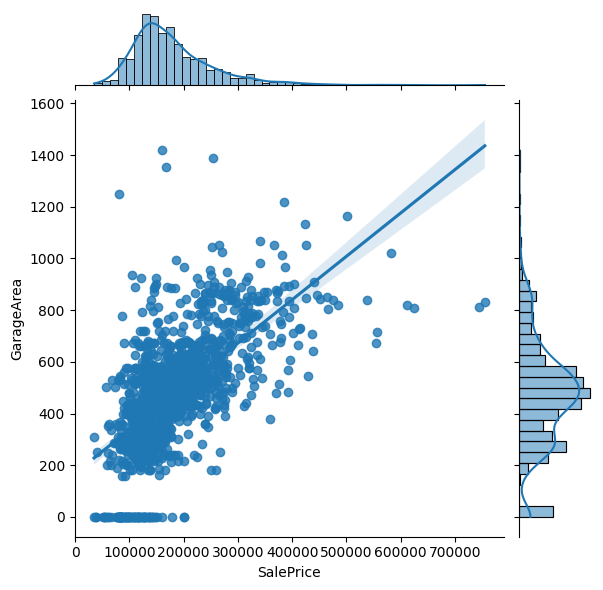

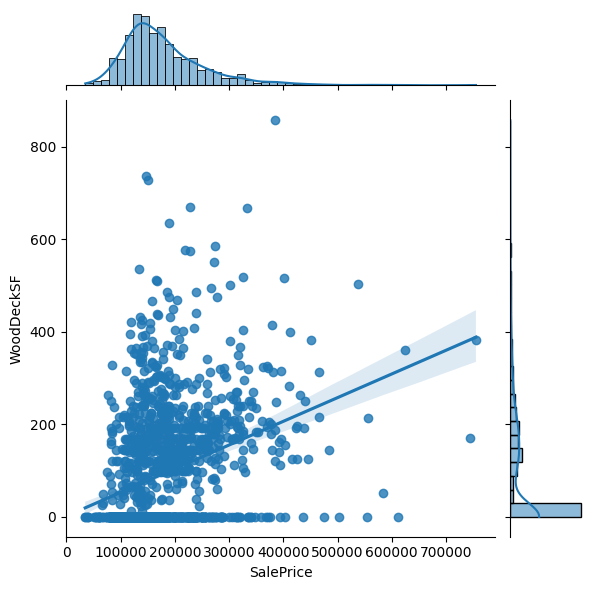

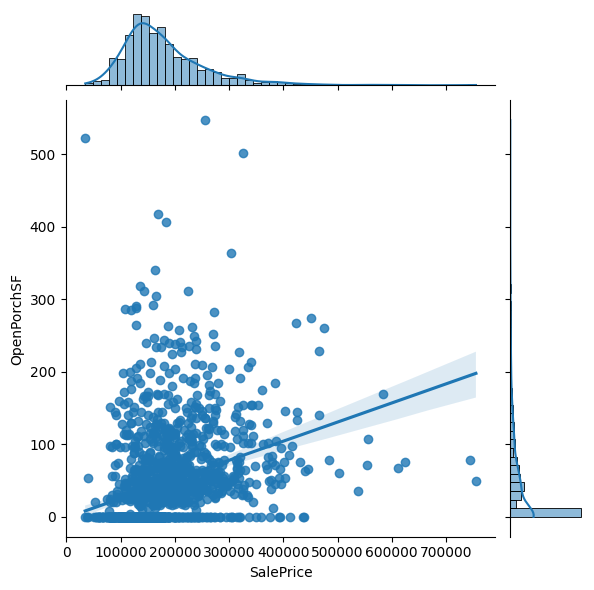

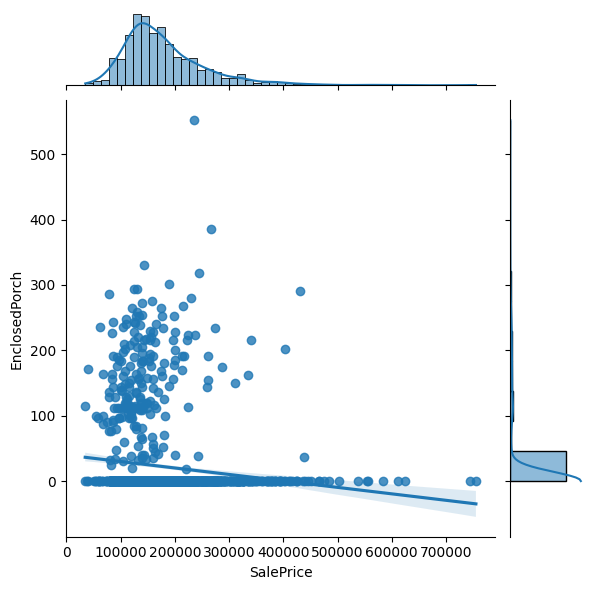

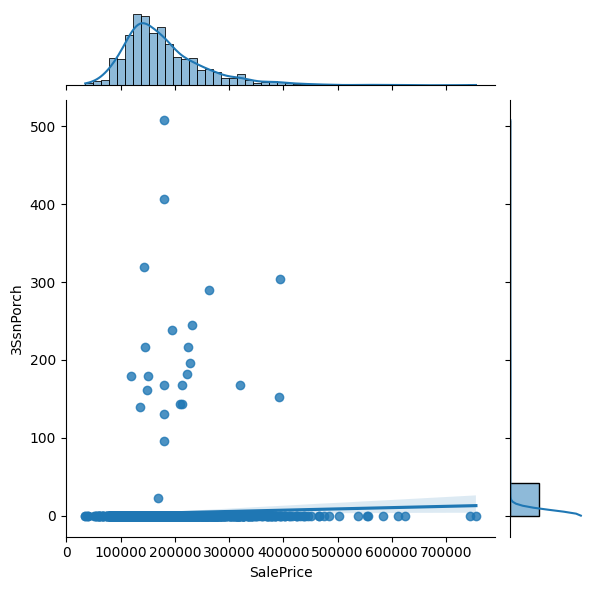

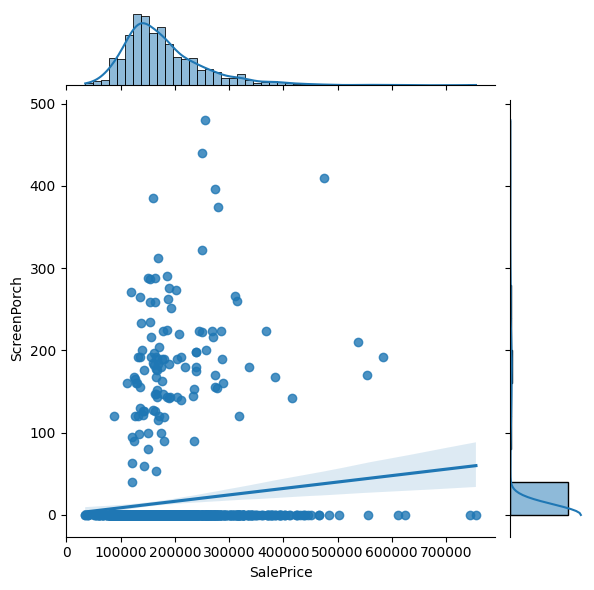

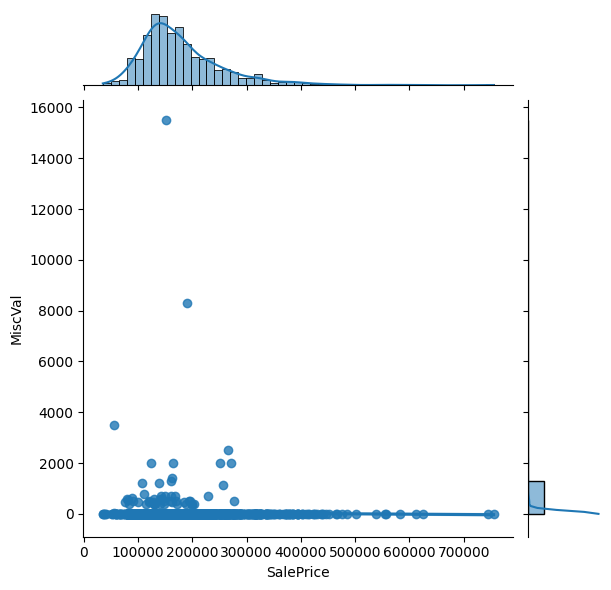

In [57]:
for var in numerical:
    correlation_plots(data, var)

### Separate train and test set

In [77]:
# IMPORTANT: keep the random_state to zero for reproducibility
# Let's separate into train and test set

X_train, X_test, y_train, y_test = train_test_split(data.drop(
    ['Id', 'SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.1,
    random_state=0)

In [78]:
# calculate elapsed time

def elapsed_years(df, var):
    # capture difference between year variable and
    # year the house was sold
    
    df[var] = df['YrSold'] - df[var]
    return df

for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    X_train = elapsed_years(X_train, var)
    X_test = elapsed_years(X_test, var)

In [79]:
# drop YrSold
X_train.drop('YrSold', axis=1, inplace=True)
X_test.drop('YrSold', axis=1, inplace=True)

In [80]:
# capture the column names for use later in the notebook
final_columns = X_train.columns

In [208]:
final_columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

## Feature Engineering Pipeline

In [82]:
# I will treat discrete variables as if they were categorical
# to treat discrete as categorical using Feature-engine
# we need to re-cast them as object

X_train[discrete] = X_train[discrete].astype('O')
X_test[discrete] = X_test[discrete].astype('O')

In [83]:
house_pipe = Pipeline([

    # missing data imputation - section 4
    ('missing_ind',
     mdi.AddMissingIndicator(
         variables=['LotFrontage', 'MasVnrArea', 'GarageYrBlt'])),

    ('imputer_num',
     mdi.MeanMedianImputer(
         imputation_method='median',
         variables=['LotFrontage', 'MasVnrArea', 'GarageYrBlt'])),

    ('imputer_cat', mdi.CategoricalImputer(variables=categorical)),


    # categorical encoding - section 6
    ('rare_label_enc',
     ce.RareLabelEncoder(tol=0.05, n_categories=1, variables=categorical + discrete)),

    # newly available categorical encoder, uses trees predictions
    ('categorical_enc',
     ce.DecisionTreeEncoder(random_state=2909, variables=categorical + discrete)),

    # discretisation - section 8
    ('discretisation',
     dsc.DecisionTreeDiscretiser(random_state=2909, variables=numerical)),

    # feature Scaling - section 10
    ('scaler', StandardScaler()),

    # regression
    ('lasso', Lasso(random_state=0))
])

In [84]:
# let's fit the pipeline
house_pipe.fit(X_train, y_train)

# let's get the predictions
X_train_preds = house_pipe.predict(X_train)
X_test_preds = house_pipe.predict(X_test)

In [85]:
# check model performance:

print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds, squared=True)))
print('train rmse: {}'.format(mean_squared_error(y_train, X_train_preds, squared=False)))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds,squared=True)))
print('test rmse: {}'.format(mean_squared_error(y_test, X_test_preds, squared=False)))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))

train mse: 617124593.3557645
train rmse: 24841.992539966766
train r2: 0.9011625223813557

test mse: 1063016789.3316755
test rmse: 32603.938248801718
test r2: 0.8453144708738004


Text(0, 0.5, 'Predicted Price')

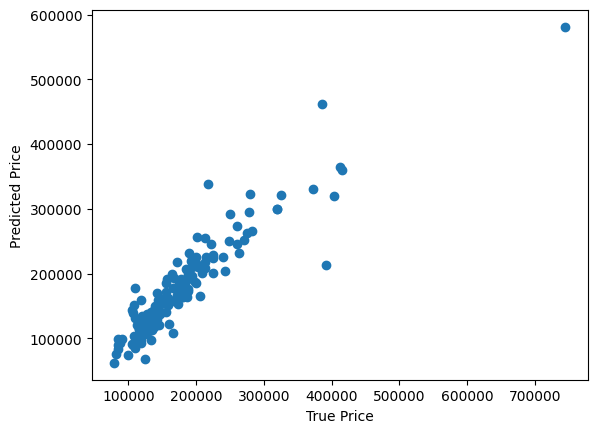

In [86]:
# plot predictions vs real value

plt.scatter(y_test,X_test_preds)
plt.xlabel('True Price')
plt.ylabel('Predicted Price')

<AxesSubplot: >

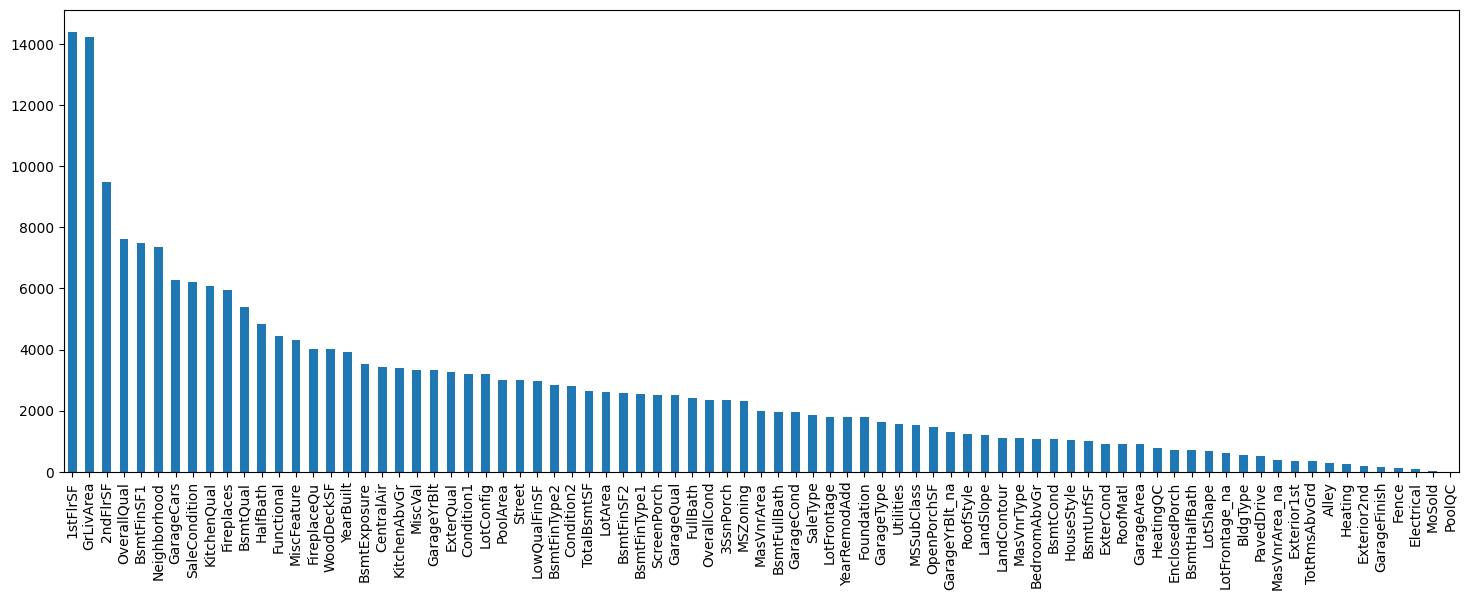

In [87]:
# let's explore the importance of the features
# the importance is given by the absolute value of the coefficient
# assigned by the Lasso

importance = pd.Series(np.abs(house_pipe.named_steps['lasso'].coef_))
importance.index = list(final_columns)+['LotFrontage_na', 'MasVnrArea_na',  'GarageYrBlt_na']
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))

### 1. Outliers removal

In [245]:
house_pipe = Pipeline(
    [
        # missing data imputation - section 4
        ("missing_ind", mdi.AddMissingIndicator(variables=["LotFrontage", "MasVnrArea", "GarageYrBlt"])),
        (
            "imputer_num",
            mdi.MeanMedianImputer(imputation_method="median", variables=["LotFrontage", "MasVnrArea", "GarageYrBlt"]),
        ),
        ("imputer_cat", mdi.CategoricalImputer(variables=categorical)),
        # categorical encoding - section 6
        ("rare_label_enc", ce.RareLabelEncoder(tol=0.05, n_categories=1, variables=categorical + discrete)),
        # newly available categorical encoder, uses trees predictions
        ("categorical_enc", ce.DecisionTreeEncoder(random_state=2909, variables=categorical + discrete)),
        # outliers removal
        ("windsoriser",
            Winsorizer(
                capping_method="iqr",  # choose iqr for IQR rule boundaries or gaussian for mean and std
                tail="right",  # cap left, right or both tails
                fold=1.5,
                variables=variables_outliers,
            ),
        ),
        # discretisation - section 8
        ("discretisation", dsc.DecisionTreeDiscretiser(random_state=2909, variables=numerical)),
        # feature Scaling - section 10
        ("scaler", StandardScaler()),
        # regression
        ("lasso", Lasso(random_state=0)),
    ]
)


In [246]:
# let's fit the pipeline
house_pipe.fit(X_train, y_train)

# let's get the predictions
X_train_preds = house_pipe.predict(X_train)
X_test_preds = house_pipe.predict(X_test)
X_train_preds = house_pipe.predict(X_train)
X_test_preds = house_pipe.predict(X_test)

In [247]:
# check model performance:

print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds, squared=True)))
print('train rmse: {}'.format(mean_squared_error(y_train, X_train_preds, squared=False)))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds,squared=True)))
print('test rmse: {}'.format(mean_squared_error(y_test, X_test_preds, squared=False)))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))

train mse: 677892485.3822796
train rmse: 26036.36851372095
train r2: 0.8914300546872018

test mse: 1090731525.6443179
test rmse: 33026.224816716756
test r2: 0.8412815443065639


Results worse

### Distribution changes

In [182]:
house_pipe = Pipeline(
    [
        # missing data imputation - section 4
        ("missing_ind", mdi.AddMissingIndicator(variables=["LotFrontage", "MasVnrArea", "GarageYrBlt"])),
        (
            "imputer_num",
            mdi.MeanMedianImputer(imputation_method="median", variables=["LotFrontage", "MasVnrArea", "GarageYrBlt"]),
        ),
        ("imputer_cat", mdi.CategoricalImputer(variables=categorical)),
        # categorical encoding - section 6
        ("rare_label_enc", ce.RareLabelEncoder(tol=0.05, n_categories=1, variables=categorical + discrete)),
        # newly available categorical encoder, uses trees predictions
        ("categorical_enc", ce.DecisionTreeEncoder(random_state=2909, variables=categorical + discrete)),
        # discretisation - section 8
        (
            "discretisation",
            dsc.DecisionTreeDiscretiser(
                random_state=2909,
                variables=[var for var in numerical if var not in var_exponential + var_log + var_squareroot],
            ),
        ),
        # logarithmic transformation
        ("log_transformer", vt.LogTransformer(variables=var_log)),
        # SquareRoot
        ('sqrt_transformer', SklearnTransformerWrapper(
        transformer=FunctionTransformer(np.sqrt, validate=True), variables=var_squareroot)),
        # Exponential transformer
        ("exp_transformer", vt.PowerTransformer(exp=0.2, variables=var_exponential)),
        # feature Scaling - section 10
        ("scaler", StandardScaler()),
        # regression
        ("lasso", Lasso(random_state=0)),
    ]
)


In [183]:
# let's fit the pipeline
house_pipe.fit(X_train, y_train)

# let's get the predictions
X_train_preds = house_pipe.predict(X_train)
X_test_preds = house_pipe.predict(X_test)
X_train_preds = house_pipe.predict(X_train)
X_test_preds = house_pipe.predict(X_test)

In [184]:
# check model performance:

print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds, squared=True)))
print('train rmse: {}'.format(mean_squared_error(y_train, X_train_preds, squared=False)))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds,squared=True)))
print('test rmse: {}'.format(mean_squared_error(y_test, X_test_preds, squared=False)))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))

train mse: 688909216.9938827
train rmse: 26247.080161303325
train r2: 0.8896656363253092

test mse: 991088441.7778498
test rmse: 31481.557168886196
test r2: 0.8557811677427482


<AxesSubplot: >

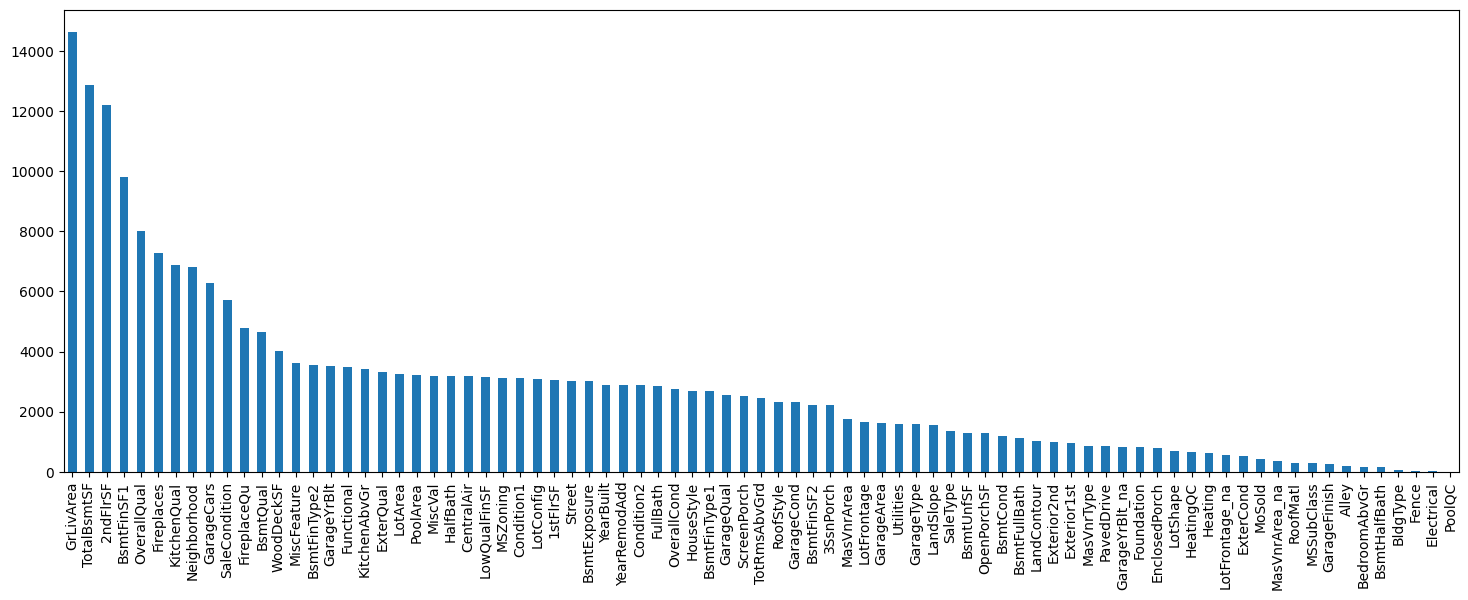

In [185]:
# let's explore the importance of the features
# the importance is given by the absolute value of the coefficient
# assigned by the Lasso

importance = pd.Series(np.abs(house_pipe.named_steps['lasso'].coef_))
importance.index = list(final_columns)+['LotFrontage_na', 'MasVnrArea_na',  'GarageYrBlt_na']
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))

### 3. Missing numerical data

In [204]:
house_pipe = Pipeline(
    [   ("imputer", SklearnTransformerWrapper(transformer = KNNImputer(weights='distance'),
        variables=["LotFrontage", "MasVnrArea", "GarageYrBlt"]),
        ),
        ("imputer_cat", mdi.CategoricalImputer(variables=categorical)),
        # categorical encoding - section 6
        ("rare_label_enc", ce.RareLabelEncoder(tol=0.05, n_categories=1, variables=categorical + discrete)),
        # newly available categorical encoder, uses trees predictions
        ("categorical_enc", ce.DecisionTreeEncoder(random_state=2909, variables=categorical + discrete)),
        # discretisation - section 8
        (
            "discretisation",
            dsc.DecisionTreeDiscretiser(
                random_state=2909,
                variables=[var for var in numerical if var not in var_exponential + var_log + var_squareroot],
            ),
        ),
        # logarithmic transformation
        ("log_transformer", vt.LogTransformer(variables=var_log)),
        # SquareRoot
        ('sqrt_transformer', SklearnTransformerWrapper(
        transformer=FunctionTransformer(np.sqrt, validate=True), variables=var_squareroot)),
        # Exponential transformer
        ("exp_transformer", vt.PowerTransformer(exp=0.2, variables=var_exponential)),
        # feature Scaling - section 10
        ("scaler", StandardScaler()),
        # regression
        ("lasso", Lasso(random_state=0)),
    ]
)


In [205]:
# let's fit the pipeline
house_pipe.fit(X_train, y_train)

# let's get the predictions
X_train_preds = house_pipe.predict(X_train)
X_test_preds = house_pipe.predict(X_test)
X_train_preds = house_pipe.predict(X_train)
X_test_preds = house_pipe.predict(X_test)

In [206]:
# check model performance:

print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds, squared=True)))
print('train rmse: {}'.format(mean_squared_error(y_train, X_train_preds, squared=False)))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds,squared=True)))
print('test rmse: {}'.format(mean_squared_error(y_test, X_test_preds, squared=False)))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))

train mse: 689085963.9302922
train rmse: 26250.446928200905
train r2: 0.8896373288788719

test mse: 983146547.824803
test rmse: 31355.167800935193
test r2: 0.8569368372304931


### Categorical encoder

In [242]:
house_pipe = Pipeline(
    [   ("imputer", SklearnTransformerWrapper(transformer = KNNImputer(weights='distance'),
        variables=["LotFrontage", "MasVnrArea", "GarageYrBlt"]),
        ),
        ("imputer_cat", mdi.CategoricalImputer(variables=categorical)),
        # categorical encoding - section 6
        ("rare_label_enc", ce.RareLabelEncoder(tol=0.01, n_categories=5, variables=categorical + discrete)),
        # newly available categorical encoder, uses trees predictions
        ("categorical_enc", ce.DecisionTreeEncoder(random_state=2909, variables=categorical + discrete)),
        # discretisation - section 8
        (
            "discretisation",
            dsc.DecisionTreeDiscretiser(
                random_state=2909,
                variables=[var for var in numerical if var not in var_exponential + var_log + var_squareroot],
            ),
        ),
        # logarithmic transformation
        ("log_transformer", vt.LogTransformer(variables=var_log)),
        # SquareRoot
        ('sqrt_transformer', SklearnTransformerWrapper(
        transformer=FunctionTransformer(np.sqrt, validate=True), variables=var_squareroot)),
        # Exponential transformer
        ("exp_transformer", vt.PowerTransformer(exp=0.2, variables=var_exponential)),
        # feature Scaling - section 10
        ("scaler", StandardScaler()),
        # regression
        ("lasso", Lasso(random_state=0)),
    ]
)


In [243]:
# let's fit the pipeline
house_pipe.fit(X_train, y_train)

# let's get the predictions
X_train_preds = house_pipe.predict(X_train)
X_test_preds = house_pipe.predict(X_test)
X_train_preds = house_pipe.predict(X_train)
X_test_preds = house_pipe.predict(X_test)

/home/nami/feature-engineering-for-machine-learning/.venv/lib/python3.9/site-packages/feature_engine/encoding/rare_label.py:199: UserWarning: The number of unique categories for variable MSZoning is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/home/nami/feature-engineering-for-machine-learning/.venv/lib/python3.9/site-packages/feature_engine/encoding/rare_label.py:199: UserWarning: The number of unique categories for variable Street is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/home/nami/feature-engineering-for-machine-learning/.venv/lib/python3.9/site-packages/feature_engine/encoding/rare_label.py:199: UserWarning: The number of unique categories for variable Alley is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/home/nami/feature-engineering-for-machine-learning/.venv/lib/python3.9/site-package

In [232]:
# check model performance:

print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds, squared=True)))
print('train rmse: {}'.format(mean_squared_error(y_train, X_train_preds, squared=False)))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds,squared=True)))
print('test rmse: {}'.format(mean_squared_error(y_test, X_test_preds, squared=False)))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))

train mse: 643427145.3091172
train rmse: 25365.86575122397
train r2: 0.8969499566888003

test mse: 882814704.2971256
test rmse: 29712.197904179448
test r2: 0.871536685944118


In [289]:
house_pipe.named_steps

{'imputer': SklearnTransformerWrapper(transformer=KNNImputer(weights='distance'),
                           variables=['LotFrontage', 'MasVnrArea',
                                      'GarageYrBlt']),
 'imputer_cat': CategoricalImputer(variables=['MSZoning', 'Street', 'Alley', 'LotShape',
                               'LandContour', 'Utilities', 'LotConfig',
                               'LandSlope', 'Neighborhood', 'Condition1',
                               'Condition2', 'BldgType', 'HouseStyle',
                               'RoofStyle', 'RoofMatl', 'Exterior1st',
                               'Exterior2nd', 'MasVnrType', 'ExterQual',
                               'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
                               'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                               'Heating', 'HeatingQC', 'CentralAir',
                               'Electrical', ...]),
 'rare_label_enc': RareLabelEncoder(n_categories=5, tol=0.01,
  

In [290]:
house_pipe.named_steps['imputer'].__dict__.keys()

dict_keys(['transformer', 'variables', 'transformer_', 'variables_', 'feature_names_in_', 'n_features_in_'])

In [294]:
house_pipe.named_steps['imputer'].transformer.__dict__

{'missing_values': nan,
 'add_indicator': False,
 'keep_empty_features': False,
 'n_neighbors': 5,
 'weights': 'distance',
 'metric': 'nan_euclidean',
 'copy': True}

In [288]:
house_pipe.named_steps['imputer_cat'].__dict__.keys()

dict_keys(['imputation_method', 'fill_value', 'variables', 'return_object', 'ignore_format', 'variables_', 'imputer_dict_', 'feature_names_in_', 'n_features_in_'])

In [296]:
house_pipe.named_steps['rare_label_enc'].encoder_dict_

{'MSZoning': array(['RL', 'RM', 'FV', 'RH', 'C (all)'], dtype=object),
 'Street': array(['Pave', 'Grvl'], dtype=object),
 'Alley': array(['Missing', 'Grvl', 'Pave'], dtype=object),
 'LotShape': array(['IR1', 'Reg', 'IR3', 'IR2'], dtype=object),
 'LandContour': array(['HLS', 'Lvl', 'Low', 'Bnk'], dtype=object),
 'Utilities': array(['AllPub', 'NoSeWa'], dtype=object),
 'LotConfig': array(['Inside', 'Corner', 'FR2', 'FR3', 'CulDSac'], dtype=object),
 'LandSlope': array(['Gtl', 'Mod', 'Sev'], dtype=object),
 'Neighborhood': Index(['NAmes', 'CollgCr', 'OldTown', 'Edwards', 'Somerst', 'NridgHt',
        'Gilbert', 'Sawyer', 'NWAmes', 'BrkSide', 'SawyerW', 'Crawfor',
        'Mitchel', 'Timber', 'NoRidge', 'IDOTRR', 'ClearCr', 'SWISU', 'StoneBr',
        'Blmngtn', 'MeadowV', 'BrDale'],
       dtype='object'),
 'Condition1': Index(['Norm', 'Feedr', 'Artery', 'RRAn', 'PosN'], dtype='object'),
 'Condition2': Index(['Norm'], dtype='object'),
 'BldgType': array(['1Fam', 'TwnhsE', 'Duplex', '2fmCo

In [300]:
data['PoolArea'].value_counts()

0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64

In [320]:
house_pipe.named_steps['categorical_enc'].encoder_.steps[1][1].binner_dict_['PoolArea'].__dict__

{'scoring': 'neg_mean_squared_error',
 'estimator': DecisionTreeRegressor(random_state=2909),
 'n_jobs': None,
 'refit': True,
 'cv': 3,
 'verbose': 0,
 'pre_dispatch': '2*n_jobs',
 'error_score': nan,
 'return_train_score': False,
 'param_grid': {'max_depth': [1, 2, 3, 4]},
 'multimetric_': False,
 'best_index_': 0,
 'best_score_': -6282054636.513669,
 'best_params_': {'max_depth': 1},
 'best_estimator_': DecisionTreeRegressor(max_depth=1, random_state=2909),
 'refit_time_': 0.0013194084167480469,
 'feature_names_in_': array(['PoolArea'], dtype=object),
 'scorer_': make_scorer(mean_squared_error, greater_is_better=False),
 'cv_results_': {'mean_fit_time': array([0.00170422, 0.00188001, 0.00191696, 0.00179299]),
  'std_fit_time': array([3.30385415e-05, 2.73438867e-04, 1.97193674e-04, 2.28082594e-04]),
  'mean_score_time': array([0.00105731, 0.00108695, 0.00109895, 0.0011491 ]),
  'std_score_time': array([2.35558950e-05, 3.44287215e-05, 5.12037165e-05, 1.66259806e-05]),
  'param_max_dep

In [298]:
house_pipe.named_steps['rare_label_enc'].__dict__

{'variables': ['MSZoning',
  'Street',
  'Alley',
  'LotShape',
  'LandContour',
  'Utilities',
  'LotConfig',
  'LandSlope',
  'Neighborhood',
  'Condition1',
  'Condition2',
  'BldgType',
  'HouseStyle',
  'RoofStyle',
  'RoofMatl',
  'Exterior1st',
  'Exterior2nd',
  'MasVnrType',
  'ExterQual',
  'ExterCond',
  'Foundation',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2',
  'Heating',
  'HeatingQC',
  'CentralAir',
  'Electrical',
  'KitchenQual',
  'Functional',
  'FireplaceQu',
  'GarageType',
  'GarageFinish',
  'GarageQual',
  'GarageCond',
  'PavedDrive',
  'PoolQC',
  'Fence',
  'MiscFeature',
  'SaleType',
  'SaleCondition',
  'MSSubClass',
  'OverallQual',
  'OverallCond',
  'BsmtFullBath',
  'BsmtHalfBath',
  'FullBath',
  'HalfBath',
  'BedroomAbvGr',
  'KitchenAbvGr',
  'TotRmsAbvGrd',
  'Fireplaces',
  'GarageCars',
  'PoolArea',
  'MoSold'],
 'ignore_format': False,
 'tol': 0.01,
 'n_categories': 5,
 'max_n_categories': None,
 'replace

In [283]:
house_pipe.named_steps['imputer_cat'].imputer_dict_

{'MSZoning': 'Missing',
 'Street': 'Missing',
 'Alley': 'Missing',
 'LotShape': 'Missing',
 'LandContour': 'Missing',
 'Utilities': 'Missing',
 'LotConfig': 'Missing',
 'LandSlope': 'Missing',
 'Neighborhood': 'Missing',
 'Condition1': 'Missing',
 'Condition2': 'Missing',
 'BldgType': 'Missing',
 'HouseStyle': 'Missing',
 'RoofStyle': 'Missing',
 'RoofMatl': 'Missing',
 'Exterior1st': 'Missing',
 'Exterior2nd': 'Missing',
 'MasVnrType': 'Missing',
 'ExterQual': 'Missing',
 'ExterCond': 'Missing',
 'Foundation': 'Missing',
 'BsmtQual': 'Missing',
 'BsmtCond': 'Missing',
 'BsmtExposure': 'Missing',
 'BsmtFinType1': 'Missing',
 'BsmtFinType2': 'Missing',
 'Heating': 'Missing',
 'HeatingQC': 'Missing',
 'CentralAir': 'Missing',
 'Electrical': 'Missing',
 'KitchenQual': 'Missing',
 'Functional': 'Missing',
 'FireplaceQu': 'Missing',
 'GarageType': 'Missing',
 'GarageFinish': 'Missing',
 'GarageQual': 'Missing',
 'GarageCond': 'Missing',
 'PavedDrive': 'Missing',
 'PoolQC': 'Missing',
 'Fenc

### Transformations analysis

In [322]:
imputer = SklearnTransformerWrapper(transformer = KNNImputer(weights='distance'),
        variables=["LotFrontage", "MasVnrArea", "GarageYrBlt"]).set_output(transform="pandas")

In [323]:
imputer.fit(X_train)

SklearnTransformerWrapper(transformer=KNNImputer(weights='distance'),
                          variables=['LotFrontage', 'MasVnrArea',
                                     'GarageYrBlt'])

In [347]:
X_test_test = imputer.transform(X_test)

In [344]:
X_test_test[["LotFrontage", "MasVnrArea", "GarageYrBlt"]].isna().any()

LotFrontage    False
MasVnrArea     False
GarageYrBlt    False
dtype: bool

In [361]:
X_test[["LotFrontage", "MasVnrArea", "GarageYrBlt"]].isna().mean()

LotFrontage    0.178082
MasVnrArea     0.013699
GarageYrBlt    0.047945
dtype: float64

In [357]:
X_test["LotFrontage"][X_test["LotFrontage"].isna()]

529    NaN
459    NaN
687    NaN
1003   NaN
1300   NaN
31     NaN
811    NaN
1358   NaN
360    NaN
330    NaN
393    NaN
426    NaN
1290   NaN
822    NaN
1122   NaN
879    NaN
364    NaN
1084   NaN
14     NaN
152    NaN
679    NaN
927    NaN
412    NaN
1429   NaN
113    NaN
310    NaN
Name: LotFrontage, dtype: float64

In [362]:
X_test_test[X_test["LotFrontage"].isna()]["LotFrontage"]

529     82.000000
459     76.384664
687     56.800000
1003    62.737983
1300    81.093631
31      47.800000
811     46.909599
1358    67.747762
360     70.600000
330     72.185271
393     70.200000
426     45.321951
1290    96.502190
822     66.800000
1122    53.800000
879     78.135092
364     67.161554
1084    58.000000
14      82.050592
152     58.724707
679     71.068242
927     75.980271
412     80.000000
1429    54.840729
113     80.317639
310     56.128384
Name: LotFrontage, dtype: float64

In [363]:
imputer_cat = mdi.CategoricalImputer(variables=categorical).set_output(transform="pandas")

In [364]:
imputer_cat.fit(X_train)

CategoricalImputer(variables=['MSZoning', 'Street', 'Alley', 'LotShape',
                              'LandContour', 'Utilities', 'LotConfig',
                              'LandSlope', 'Neighborhood', 'Condition1',
                              'Condition2', 'BldgType', 'HouseStyle',
                              'RoofStyle', 'RoofMatl', 'Exterior1st',
                              'Exterior2nd', 'MasVnrType', 'ExterQual',
                              'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
                              'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                              'Heating', 'HeatingQC', 'CentralAir',
                              'Electrical', ...])

In [365]:
X_test_test = imputer_cat.transform(X_test)

In [370]:
X_test[categorical].isna().mean()[X_test[categorical].isna().mean() > 0]

Alley           0.931507
MasVnrType      0.013699
BsmtQual        0.034247
BsmtCond        0.034247
BsmtExposure    0.034247
BsmtFinType1    0.034247
BsmtFinType2    0.034247
FireplaceQu     0.472603
GarageType      0.047945
GarageFinish    0.047945
GarageQual      0.047945
GarageCond      0.047945
PoolQC          0.993151
Fence           0.746575
MiscFeature     0.979452
dtype: float64

In [371]:
X_test_test['Alley'].value_counts()

Missing    136
Pave         5
Grvl         5
Name: Alley, dtype: int64

In [374]:
rare_label_enc = ce.RareLabelEncoder(tol=0.01, n_categories=5, variables=['PoolArea']).set_output(transform="pandas")
rare_label_enc.fit(X_train)

RareLabelEncoder(n_categories=5, tol=0.01, variables=['PoolArea'])

In [382]:
X_train_test = rare_label_enc.transform(X_train)

In [383]:
X_train_test['PoolArea'].value_counts()

0       1308
Rare       6
Name: PoolArea, dtype: int64

In [384]:
categorical_enc = ce.DecisionTreeEncoder(random_state=2909, variables=['PoolArea']).set_output(transform="pandas")
categorical_enc.fit(X_train_test, y_train)

DecisionTreeEncoder(random_state=2909, variables=['PoolArea'])

In [387]:
X_train_test2 = categorical_enc.transform(X_train_test)

In [388]:
X_train_test2['PoolArea'].value_counts()

180898.631498    1308
211995.000000       6
Name: PoolArea, dtype: int64